In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np

# Change a few settings to my liking
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)

In [2]:
crime = pd.read_csv(r'C:\Users\bigba\codingClass\crimedata2.csv',encoding = "ISO-8859-1")

In [3]:
crime.shape

(2215, 147)

In [4]:
crime.head(1).T

,0
Êcommunityname,BerkeleyHeightstownship
state,NJ
countyCode,39
communityCode,5320
fold,1
population,11980
householdsize,3.1
racepctblack,1.37
racePctWhite,91.78
racePctAsian,6.5


In [5]:
# Change ? to nulls, so that they can be more accurately counted
crime.replace('?', np.nan, inplace=True)

# Check the dataset for nulls
null_counts = crime.isnull().sum().sort_values(ascending=False)
null_counts.head(50)

PctPolicBlack           1872
PolicAveOTWorked        1872
PolicOperBudg           1872
LemasPctPolicOnPatr     1872
LemasGangUnitDeploy     1872
NumKindsDrugsSeiz       1872
PolicBudgPerPop         1872
OfficAssgnDrugUnits     1872
PctPolicMinor           1872
PctPolicAsian           1872
PctPolicHisp            1872
PctPolicWhite           1872
RacialMatchCommPol      1872
PolicPerPop             1872
PolicReqPerOffic        1872
LemasTotReqPerPop       1872
LemasTotalReq           1872
LemasSwFTFieldPerPop    1872
LemasSwFTFieldOps       1872
LemasSwFTPerPop         1872
LemasSwornFT            1872
PolicCars               1872
communityCode           1224
countyCode              1221
ViolentCrimesPerPop      221
rapesPerPop              208
rapes                    208
nonViolPerPop             97
arsonsPerPop              91
arsons                    91
assaults                  13
assaultPerPop             13
autoTheftPerPop            3
autoTheft                  3
larcenies     

In [6]:
# Make crime2, which is crime but without any columns that had more than 100 nulls
crime2 = crime.loc[:, crime.isnull().sum() <= 100]

In [7]:
# Check the new null counts
null_counts2 = crime2.isnull().sum().sort_values(ascending=False)
null_counts2.head()

nonViolPerPop    97
arsonsPerPop     91
arsons           91
assaultPerPop    13
assaults         13
dtype: int64

In [8]:
# Drop any rows with null values
crime3 = crime2.dropna()
crime3.isnull().sum().sort_values(ascending=False).head()

Êcommunityname    0
state             0
RentHighQ         0
RentMedian        0
RentLowQ          0
dtype: int64

In [9]:
# Create a new dataframe which does not include irrelevant columns, but that does include how often people are relocating
places = crime3.drop(columns = ['state', 'Êcommunityname', 'fold', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
                             'PctImmigRec10', 'PctRecentImmig', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 
                             'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctForeignBorn', 'PctBornSameState', 'LandArea',
                             'PctUsePubTrans', 'LemasPctOfficDrugUn', 'murders', 'murdPerPop', 'robberies', 'robbbPerPop',
                             'assaults', 'assaultPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheft', 'autoTheftPerPop',
                             'arsons', 'arsonsPerPop', 'nonViolPerPop', 'racepctblack', 'agePct16t24',
                             'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct65up',
                             'numbUrban', 'pctUrban', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
                             'HispPerCap', 'pctWSocSec', 'pctWFarmSelf', 'pctWRetire', 'MalePctDivorce', 'MalePctNevMarr',
                             'FemalePctDiv', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'NumImmig', 'householdsize',
                             'PersPerFam', 'PctFam2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
                             'PctWorkMom', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctBSorMore',
                             'PctPersDenseHous', 'HousVacant', 'PctHousOwnOcc', 'NumUnderPov', 'PctLess9thGrade', 'PctEmplManu',
                             'PctVacMore6Mos', 'MedYrHousBuilt', 'PctLargHouseFam', 'PctLargHouseOccup',
                             'PctHousNoPhone', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart' ,'OwnOccQrange', 'NumInShelters',
                             'RentLowQ', 'RentMedian', 'RentHighQ', 'RentQrange', 'MedRent', 'MedOwnCostPctInc', 'PctEmplProfServ',
                             'MedOwnCostPctIncNoMtg', 'PopDens', 'NumKidsBornNeverMar', 'perCapInc', 'PctEmploy',
                             'PctKidsBornNeverMar', 'NumStreet', 'PctOccupManu', 'PctOccupMgmtProf', 'population', 'burglaries'])

In [10]:
places.dtypes

racePctWhite         float64
medIncome              int64
pctWWage             float64
pctWInvInc           float64
pctWPubAsst          float64
medFamInc              int64
PctPopUnderPov       float64
PctNotHSGrad         float64
PctUnemployed        float64
TotalPctDiv          float64
PctKids2Par          float64
PctPersOwnOccup      float64
PctHousLess3BR       float64
MedNumBR               int64
PctHousOccup         float64
PctVacantBoarded     float64
PctWOFullPlumb       float64
MedRentPctHousInc    float64
PctSameHouse85       float64
PctSameCity85        float64
PctSameState85       float64
burglPerPop           object
dtype: object

In [11]:
# Convert 'burglPerPop' to float
places['burglPerPop'] = pd.to_numeric(places['burglPerPop'], errors='coerce')

In [12]:
# Create a new dataframe which does not include how often people are relocating. We will use the previous dataframe later,
# however, first we'll be using this one
trim = places.drop(columns = ['PctSameHouse85', 'PctSameCity85', 'PctSameState85'])

In [13]:
# Check out the streamlined dataframe
trim.head(1).T

,0
racePctWhite,91.78
medIncome,75122.00
pctWWage,89.24
pctWInvInc,70.20
pctWPubAsst,1.03
medFamInc,79584.00
PctPopUnderPov,1.96
PctNotHSGrad,9.90
PctUnemployed,2.70
TotalPctDiv,4.47


In [14]:
# Check out the new shape
trim.shape

(2107, 19)

In [15]:
places.shape

(2107, 22)

In [16]:
# Create a new dataframe to test a baseline model on
baseline = trim.copy()

In [17]:
# Calculate the average of the target variable
mean_value = baseline['burglPerPop'].mean()

# Create a new column 'Prediction' where every value is the mean of 'burglPerPop'
baseline['Prediction'] = mean_value

# Make sure everything looks right
baseline.head()

,racePctWhite,medIncome,pctWWage,pctWInvInc,pctWPubAsst,medFamInc,PctPopUnderPov,PctNotHSGrad,PctUnemployed,TotalPctDiv,PctKids2Par,PctPersOwnOccup,PctHousLess3BR,MedNumBR,PctHousOccup,PctVacantBoarded,PctWOFullPlumb,MedRentPctHousInc,burglPerPop,Prediction
0,91.78,75122,89.24,70.20,1.03,79584,1.96,9.90,2.70,4.47,90.17,91.46,11.06,3,98.37,3.12,0.28,23.8,114.85,1033.311324
1,95.57,47917,78.99,64.11,2.75,55323,3.98,13.72,2.43,5.42,85.33,89.03,23.60,3,97.15,0.00,0.14,27.6,242.37,1033.311324
2,94.33,35669,82.00,55.73,2.94,42112,4.75,9.09,4.01,12.55,78.85,64.18,47.46,3,95.68,0.92,0.12,24.1,758.14,1033.311324
4,89.16,17390,69.33,42.82,11.21,24018,29.99,23.06,9.08,9.73,55.20,58.13,55.64,2,92.45,3.90,0.82,32.2,728.93,1033.311324
5,95.65,21577,75.78,41.15,7.12,27705,17.78,23.03,5.72,13.04,69.79,57.81,53.19,2,91.81,2.09,0.31,26.4,1386.46,1033.311324


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the actual values (your true target variable)
y_true = baseline['burglPerPop']

# Predicted values (which are just the mean for all rows in the baseline model)
y_pred = baseline['Prediction']

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 554.2059883782874
Mean Squared Error (MSE): 587785.9034708142
Root Mean Squared Error (RMSE): 766.6719660133754


In [19]:
baseline = pd.get_dummies(baseline)

In [20]:
baseline.head()

,racePctWhite,medIncome,pctWWage,pctWInvInc,pctWPubAsst,medFamInc,PctPopUnderPov,PctNotHSGrad,PctUnemployed,TotalPctDiv,PctKids2Par,PctPersOwnOccup,PctHousLess3BR,MedNumBR,PctHousOccup,PctVacantBoarded,PctWOFullPlumb,MedRentPctHousInc,burglPerPop,Prediction
0,91.78,75122,89.24,70.20,1.03,79584,1.96,9.90,2.70,4.47,90.17,91.46,11.06,3,98.37,3.12,0.28,23.8,114.85,1033.311324
1,95.57,47917,78.99,64.11,2.75,55323,3.98,13.72,2.43,5.42,85.33,89.03,23.60,3,97.15,0.00,0.14,27.6,242.37,1033.311324
2,94.33,35669,82.00,55.73,2.94,42112,4.75,9.09,4.01,12.55,78.85,64.18,47.46,3,95.68,0.92,0.12,24.1,758.14,1033.311324
4,89.16,17390,69.33,42.82,11.21,24018,29.99,23.06,9.08,9.73,55.20,58.13,55.64,2,92.45,3.90,0.82,32.2,728.93,1033.311324
5,95.65,21577,75.78,41.15,7.12,27705,17.78,23.03,5.72,13.04,69.79,57.81,53.19,2,91.81,2.09,0.31,26.4,1386.46,1033.311324


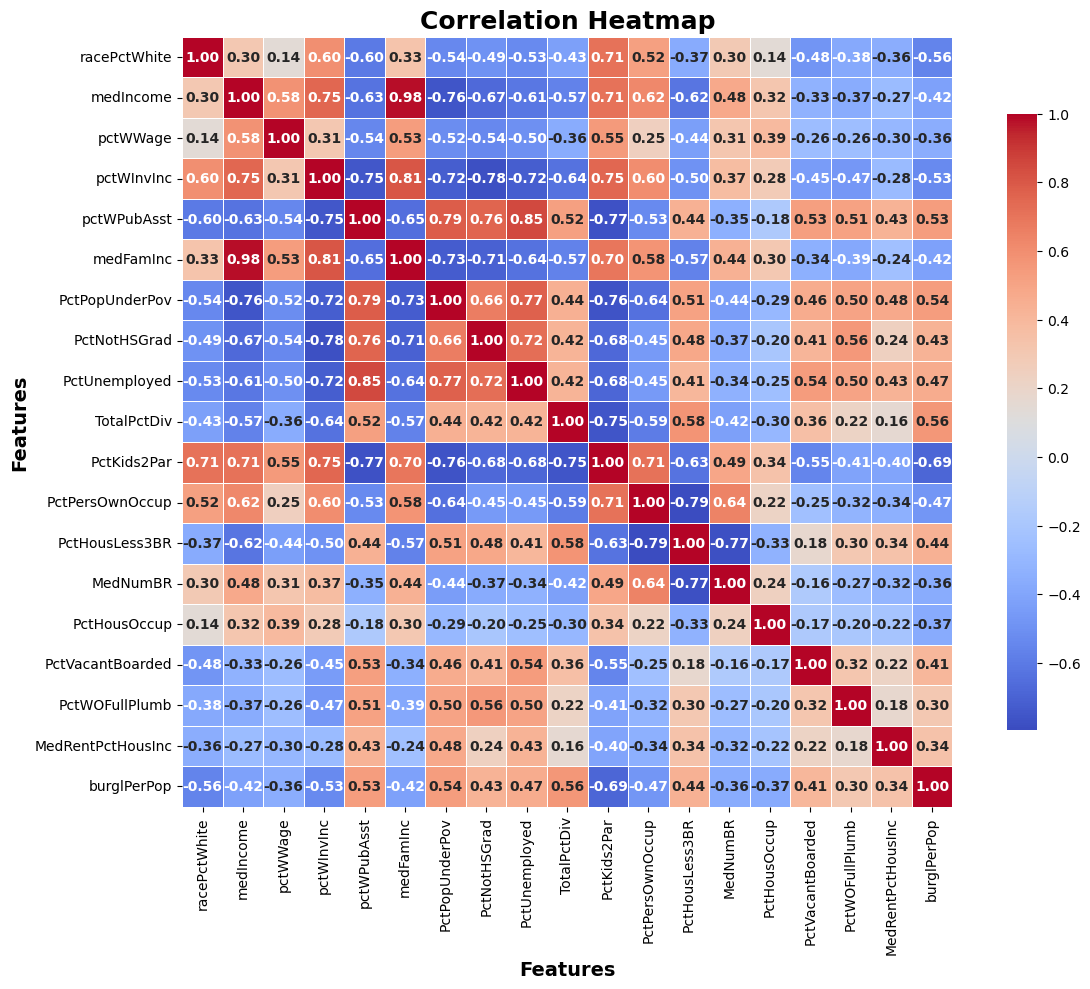

In [21]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = trim.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap with improved aesthetics
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .8},
            linecolor='white',  # Color of lines between cells
            annot_kws={"size": 10, "weight": "bold"},  # Annotation properties
            xticklabels=correlation_matrix.columns,  # Ensure columns are labeled
            yticklabels=correlation_matrix.columns  # Ensure rows are labeled
           )

# Set titles and labels
plt.title('Correlation Heatmap', fontsize=18, weight='bold')
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Features', fontsize=14, weight='bold')

plt.show()

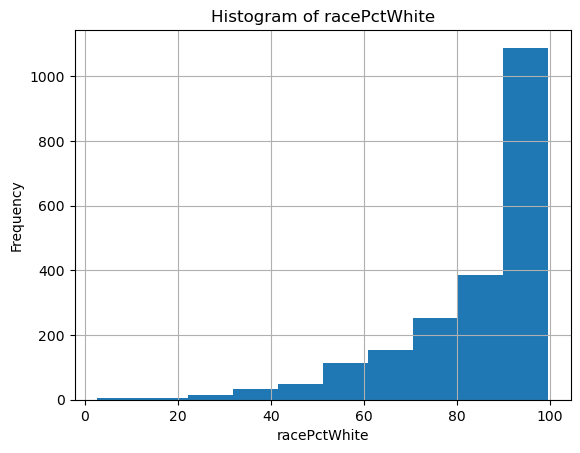

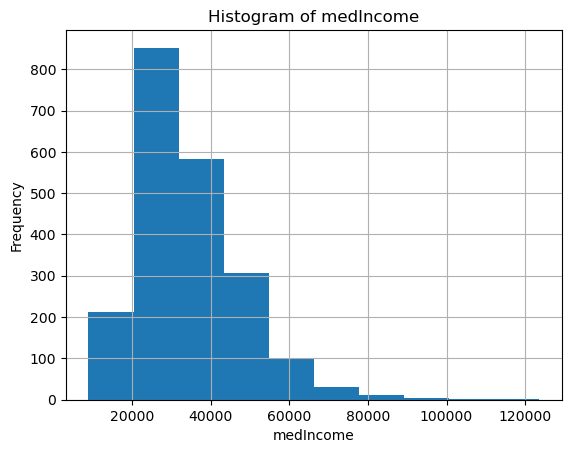

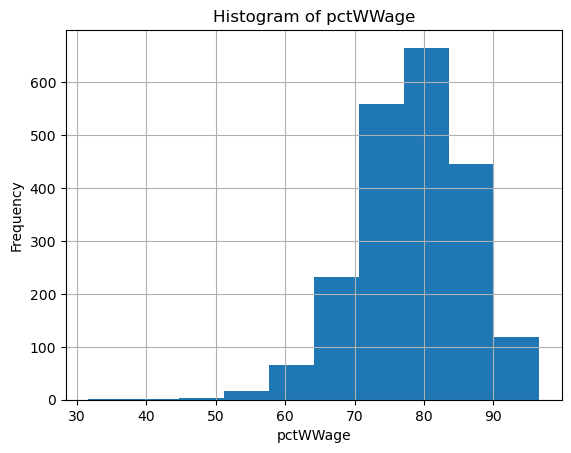

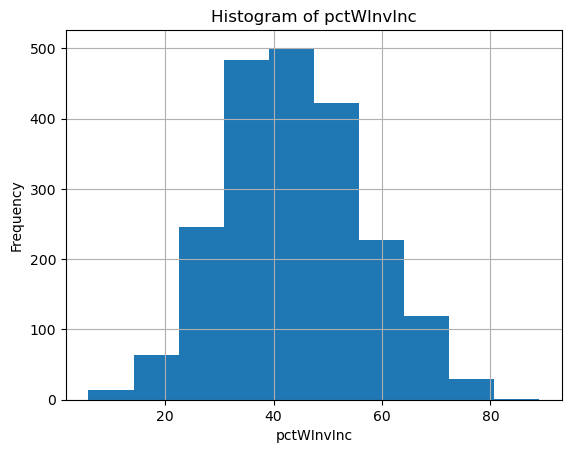

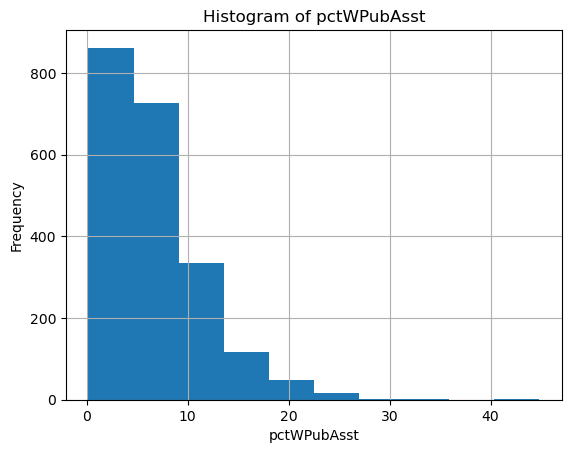

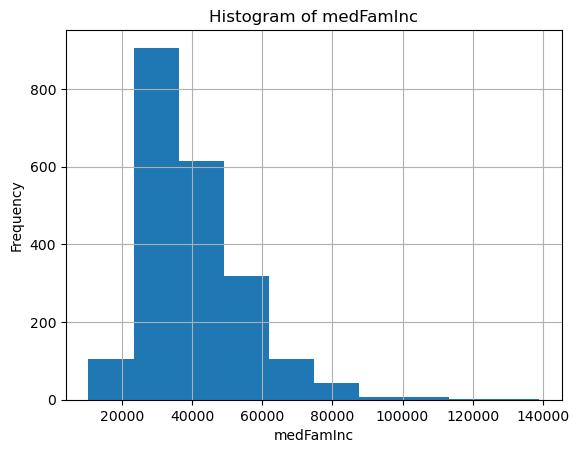

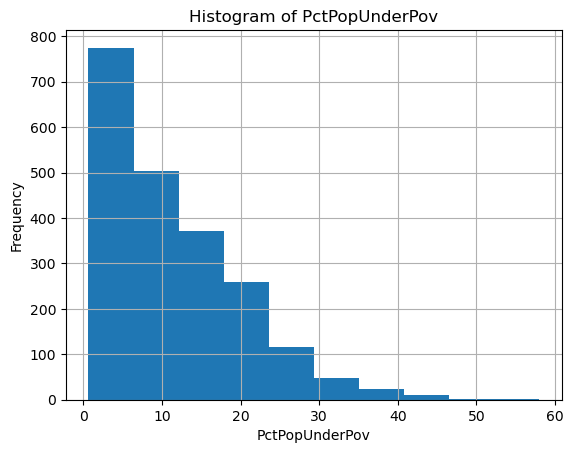

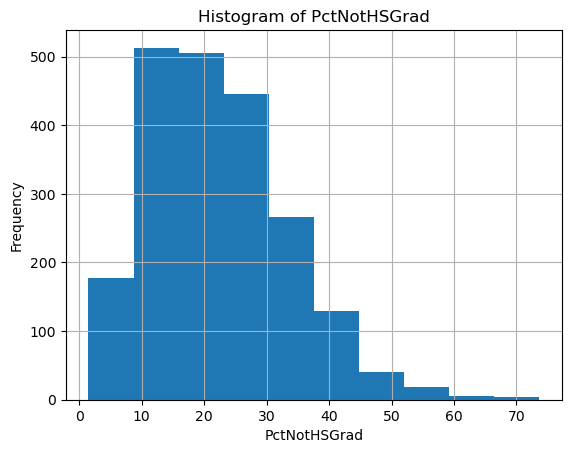

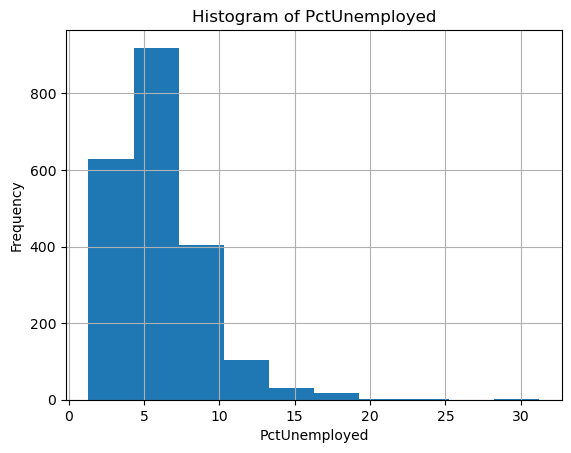

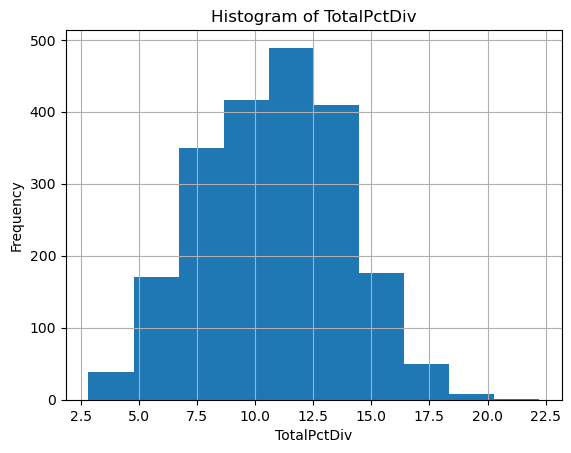

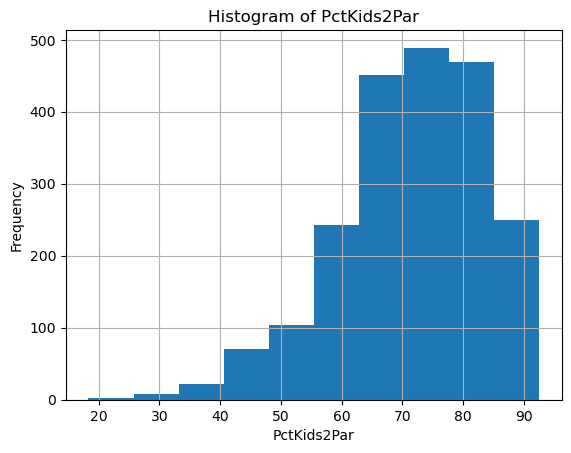

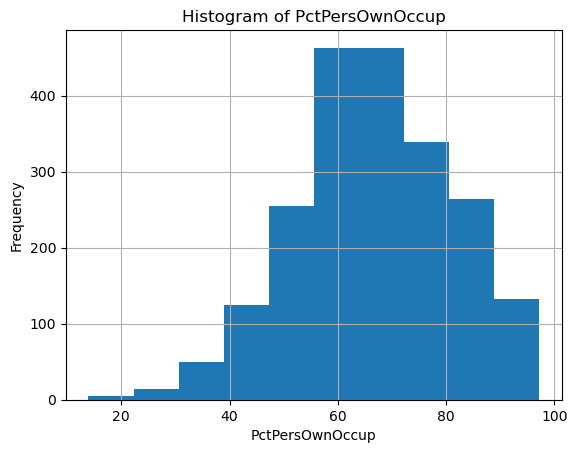

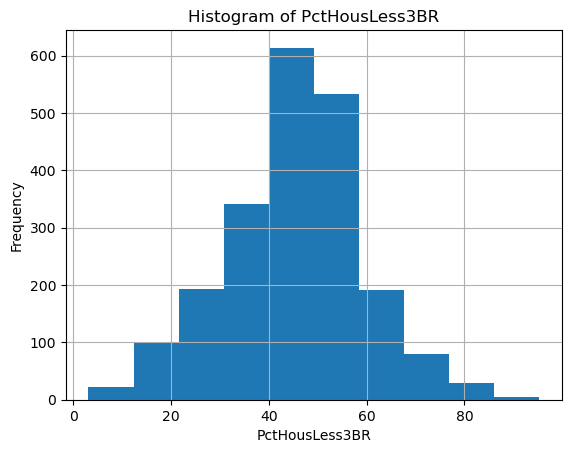

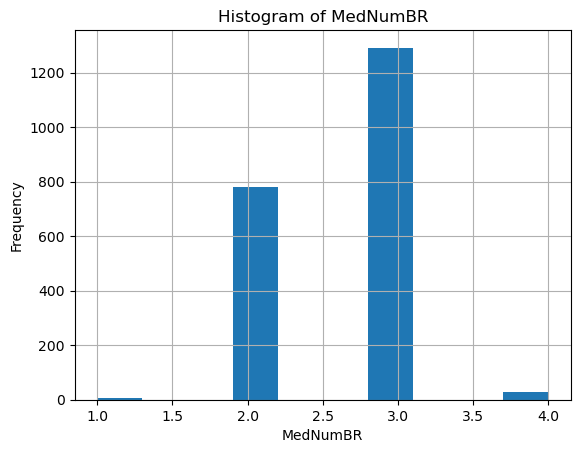

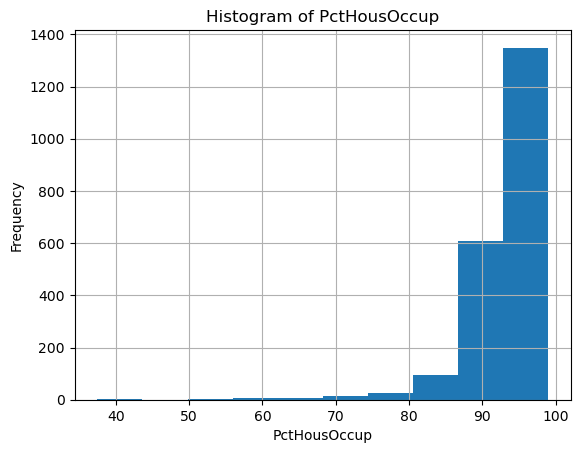

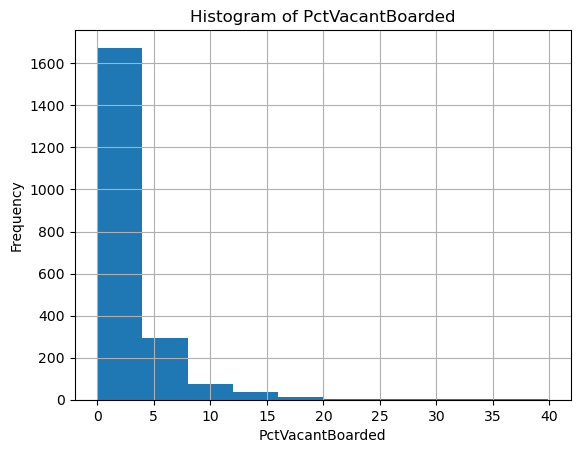

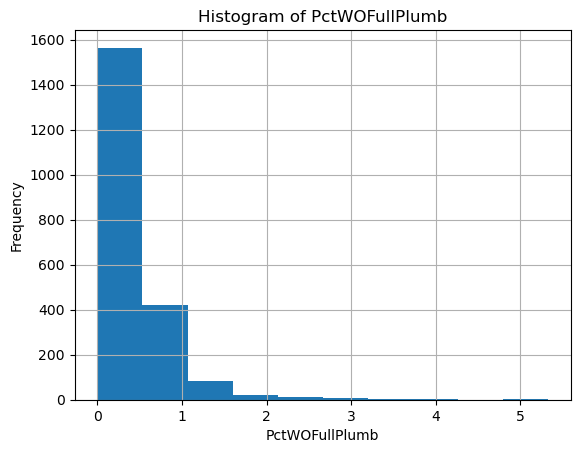

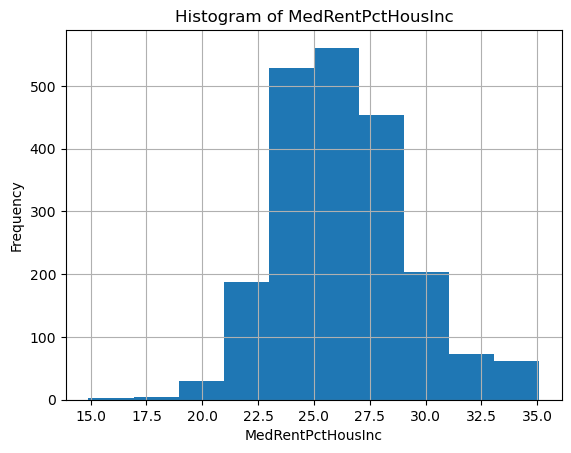

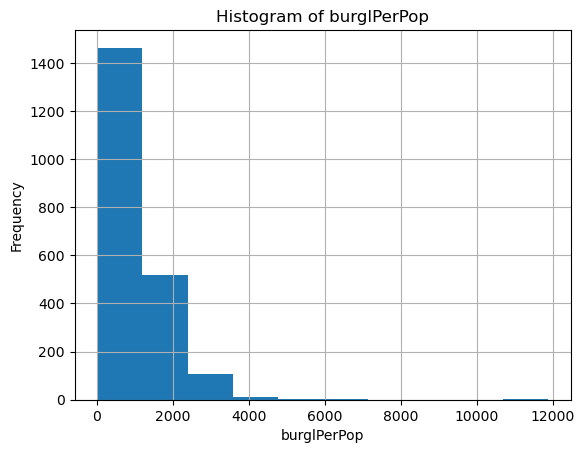

In [22]:
# Create a histogram for each variable, so it can be investigated
for column in trim.columns:
    plt.figure()
    trim[column].hist(bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [23]:
# Filter values in 'burglPerPop' greater than 4000 and calculate the sum
burg_count = trim[trim['burglPerPop'] > 4000]['burglPerPop'].count()

# Print the result
print(f"Count of burglPerPop values greater than 4000: {burg_count}")

Count of burglPerPop values greater than 4000: 10


In [24]:
# Remove outliers in 'burglPerPop' so that its histogram will be more useful
trim_filtered = trim[trim['burglPerPop'] <= 4000]

In [25]:
# Show how many outliers were removed
print(trim.shape)
print(trim_filtered.shape)

(2107, 19)
(2097, 19)


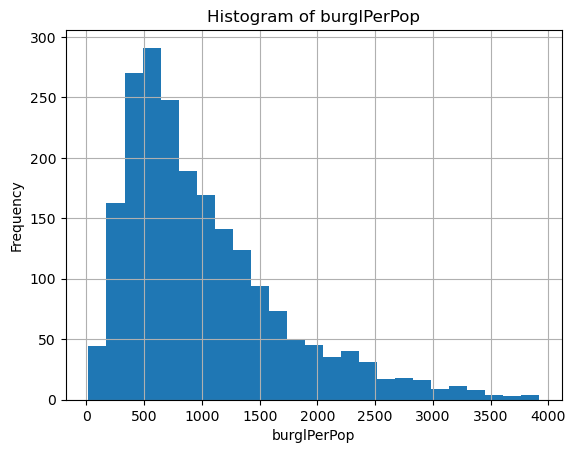

In [26]:
# Create a histogram for the filtered variable
plt.figure()
trim_filtered['burglPerPop'].hist(bins=25)
plt.title('Histogram of burglPerPop')
plt.xlabel("burglPerPop")
plt.ylabel('Frequency')
plt.show()

In [27]:
# Import neccessary libraries
from sklearn.model_selection import train_test_split, cross_val_score

# Define the features and target variable using AvgIncome
medFeatures = ['racePctWhite', 'medIncome', 'pctWWage', 'pctWInvInc', 'pctWPubAsst',
       'PctPopUnderPov', 'PctNotHSGrad', 'PctUnemployed',
       'TotalPctDiv', 'PctKids2Par', 'PctPersOwnOccup', 'PctHousLess3BR',
       'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'PctWOFullPlumb',
       'MedRentPctHousInc']
target = 'burglPerPop'

# Split the data into training and testing sets
X = trim[medFeatures]
y = trim[target]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [28]:
# Import neccessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [29]:
# Generate predictions from the trained models
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate and calculate performance metrics for each model
rf_mae = mean_absolute_error(y_test, rf_predictions)  # Random Forest evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

gbm_mae = mean_absolute_error(y_test, gbm_predictions)  # Gradient Boosting evaluation
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
gbm_r2 = r2_score(y_test, gbm_predictions)

# Display the evaluation results for both models
print("Random Forest Regression Metrics using Median Income:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R²:", rf_r2)
print()
print("Gradient Boosting Regression Metrics using Median Income:")
print("MAE:", gbm_mae)
print("MSE:", gbm_mse)
print("RMSE:", gbm_rmse)
print("R²:", gbm_r2)

Random Forest Regression Metrics using Median Income:
MAE: 326.43124250474386
MSE: 207572.84833580558
RMSE: 455.60163337701675
R²: 0.5834185205099003

Gradient Boosting Regression Metrics using Median Income:
MAE: 316.2767597231284
MSE: 205042.6926999765
RMSE: 452.8164006526006
R²: 0.58849633288548


In [30]:
# Perform 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("\nRandom Forest Cross-Validation Scores (MAE):", -rf_cv_scores)
print("Average MAE for Random Forest:", -rf_cv_scores.mean())

# Perform 5-fold cross-validation for Gradient Boosting
gbm_cv_scores = cross_val_score(gbm_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("\nGradient Boosting Cross-Validation Scores (MAE):", -gbm_cv_scores)
print("Average MAE for Gradient Boosting:", -gbm_cv_scores.mean())


Random Forest Cross-Validation Scores (MAE): [353.93769336 313.55444526 312.82187862 316.2446095  353.01684347]
Average MAE for Random Forest: 329.91509404340826

Gradient Boosting Cross-Validation Scores (MAE): [350.38577329 305.81558692 323.89780134 312.37683178 336.40001787]
Average MAE for Gradient Boosting: 325.7752022399125


In [31]:
# Construct table
data = {
    'Metrics': ['Mean Average Error', 'Mean Square Error', 'Root Mean Square Error', 'R-Squared Value', 'Cross Validation Mean'],
    'Random Forest': [
        rf_mae,
        rf_mse,
        rf_rmse,
        rf_r2,
        -rf_cv_scores.mean()
    ],
    'Gradient Boosting': [
        gbm_mae,
        gbm_mse,
        gbm_rmse,
        gbm_r2,
        -gbm_cv_scores.mean()
    ]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Remove commas from the numerical values
results_df['Random Forest'] = results_df['Random Forest'].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
results_df['Gradient Boosting'] = results_df['Gradient Boosting'].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

# Display the table
print(results_df.to_string(index=False))

               Metrics Random Forest Gradient Boosting
    Mean Average Error        326.43            316.28
     Mean Square Error     207572.85         205042.69
Root Mean Square Error        455.60            452.82
       R-Squared Value          0.58              0.59
 Cross Validation Mean        329.92            325.78


In [32]:
# Define the features and target using MedIncome
medFamFeatures = ['racePctWhite', 'pctWWage', 'pctWInvInc', 'pctWPubAsst',
       'PctPopUnderPov', 'PctNotHSGrad', 'PctUnemployed', 'medFamInc',
       'TotalPctDiv', 'PctKids2Par', 'PctPersOwnOccup', 'PctHousLess3BR',
       'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'PctWOFullPlumb',
       'MedRentPctHousInc']
target = 'burglPerPop'

# Split the data into training and testing sets
X = trim[medFamFeatures]
y = trim[target]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [33]:
# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [34]:
# Generate predictions from the trained models
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate and calculate performance metrics for each model
rf_mae = mean_absolute_error(y_test, rf_predictions)  # Random Forest evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

gbm_mae = mean_absolute_error(y_test, gbm_predictions)  # Gradient Boosting evaluation
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
gbm_r2 = r2_score(y_test, gbm_predictions)

In [35]:
# Perform 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Perform 5-fold cross-validation for Gradient Boosting
gbm_cv_scores = cross_val_score(gbm_model, X, y, cv=5, scoring='neg_mean_absolute_error')

In [36]:
#Create table
data = {
    'Metrics': ['Mean Average Error', 'Mean Square Error', 'Root Mean Square Error', 'R-Squared Value', 'Cross Validation Mean'],
    'Random Forest': [
        rf_mae,
        rf_mse,
        rf_rmse,
        rf_r2,
        -rf_cv_scores.mean()
    ],
    'Gradient Boosting': [
        gbm_mae,
        gbm_mse,
        gbm_rmse,
        gbm_r2,
        -gbm_cv_scores.mean()
    ]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Remove commas from the numerical values
results_df['Random Forest'] = results_df['Random Forest'].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
results_df['Gradient Boosting'] = results_df['Gradient Boosting'].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

# Display the table
print(results_df.to_string(index=False))

               Metrics Random Forest Gradient Boosting
    Mean Average Error        314.39            326.52
     Mean Square Error     188632.41         212776.07
Root Mean Square Error        434.32            461.28
       R-Squared Value          0.60              0.55
 Cross Validation Mean        331.38            326.20


In [37]:
# Convert the 'burglPerPop' column from object type to float for numerical operations
trim['burglPerPop'] = trim['burglPerPop'].astype(float)

# Calculate the 75th percentile (threshold) of 'burglPerPop' to differentiate high and low burglary rates
threshold = trim['burglPerPop'].quantile(0.75)

# Create a new column 'BurgClass' that classifies areas as 'High Burglaries' or 'Low Burglaries'
# based on whether 'burglPerPop' is above or below the threshold
trim['BurgClass'] = ['High Burglaries' if x >= threshold else 'Low Burglaries' for x in trim['burglPerPop']]

In [38]:
# Split the data into training and testing sets
X = trim[medFeatures]
y = trim['BurgClass']
X_train, X_test, y_train, y_test = train_test_split(X,y)

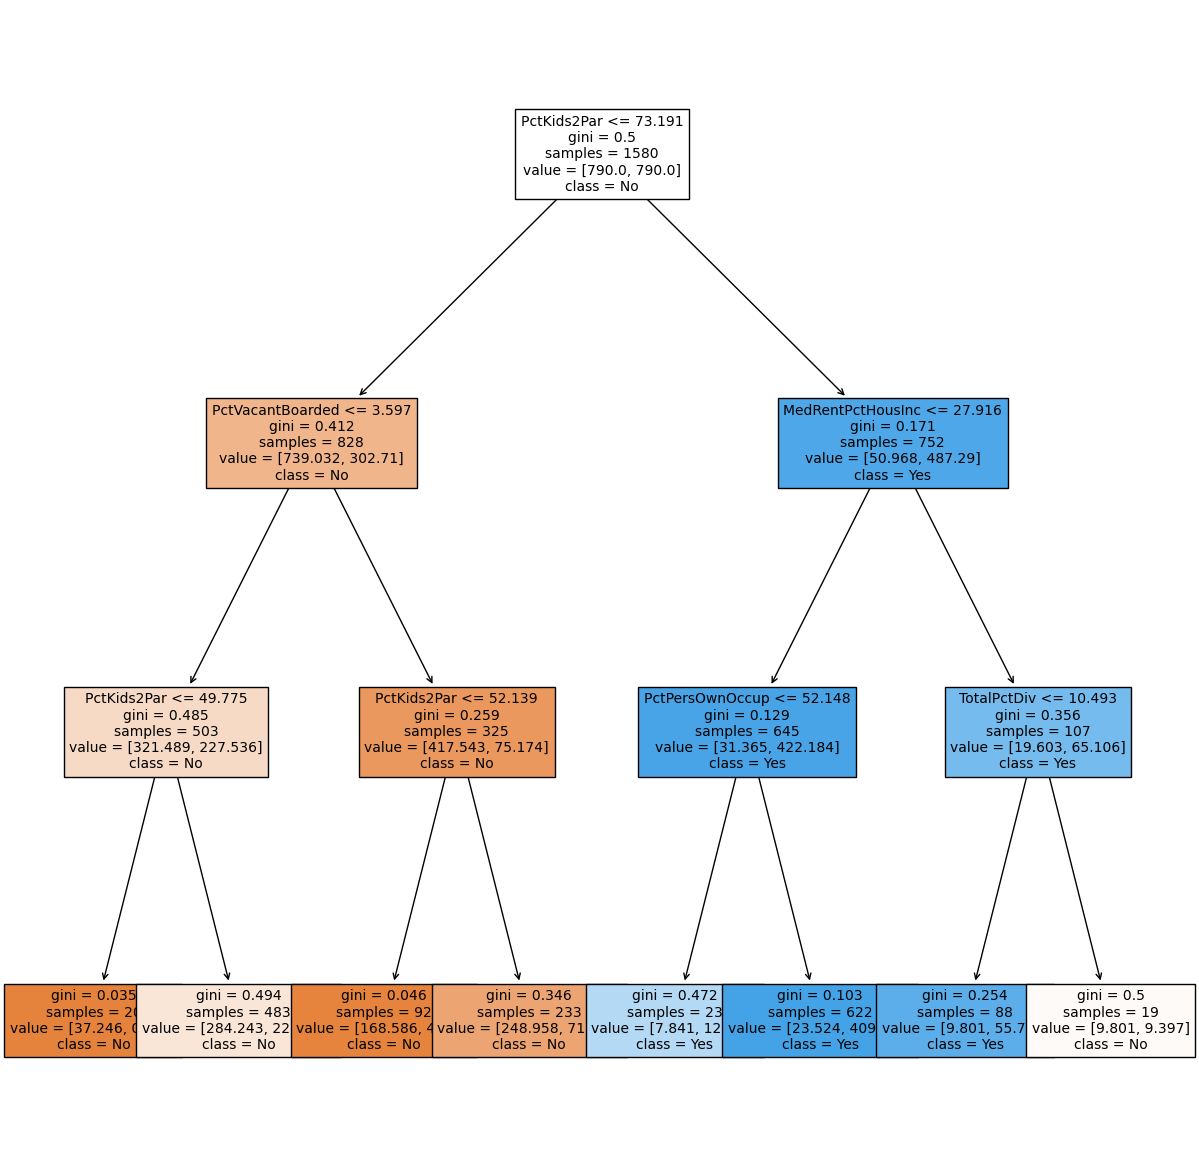

In [39]:
from sklearn import tree
from sklearn import metrics

# Define and run a decision tree model with customizable parameters
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    # Initialize and train the decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=d, 
                                      class_weight=cw, 
                                      criterion=c, splitter=s, 
                                      min_samples_leaf=msl)
    
    # Train the classifier on the training data
    clf2 = clf.fit(X_train, y_train)

    # Plot the trained decision tree
    plt.figure(figsize=(15, 15))
    tree.plot_tree(clf2, 
                   feature_names=medFeatures, 
                   class_names=['No', 'Yes'], 
                   filled=True, 
                   fontsize=10)
    plt.show()

    # Predict and evaluate model performance on test data
    y_pred = clf2.predict(X_test)
    
    # Generate the classification report
    report = metrics.classification_report(y_test, y_pred)
    return report

# Run the model
classification_report = run_model()

In [40]:
# Perform 5-fold cross-validation for Decision Tree
clf_for_cv = tree.DecisionTreeClassifier(max_depth=3, class_weight='balanced', criterion='gini', splitter='random', min_samples_leaf=1)
clf_cv_scores = cross_val_score(clf_for_cv, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores and their average
print("Decision Tree Cross-Validation Scores (Accuracy):", clf_cv_scores)

Decision Tree Cross-Validation Scores (Accuracy): [0.77014218 0.73459716 0.85035629 0.79572447 0.78622328]


In [41]:
# Print the classification report in a separate cell
print(classification_report)
print("Average Accuracy for Decision Tree:", clf_cv_scores.mean())

                 precision    recall  f1-score   support

High Burglaries       0.43      0.92      0.59       124
 Low Burglaries       0.96      0.63      0.76       403

       accuracy                           0.70       527
      macro avg       0.70      0.77      0.68       527
   weighted avg       0.84      0.70      0.72       527

Average Accuracy for Decision Tree: 0.7874086748995281


In [42]:
# Split the data into training and testing sets
X = trim[medFamFeatures]
y = trim['BurgClass']
X_train, X_test, y_train, y_test = train_test_split(X,y)

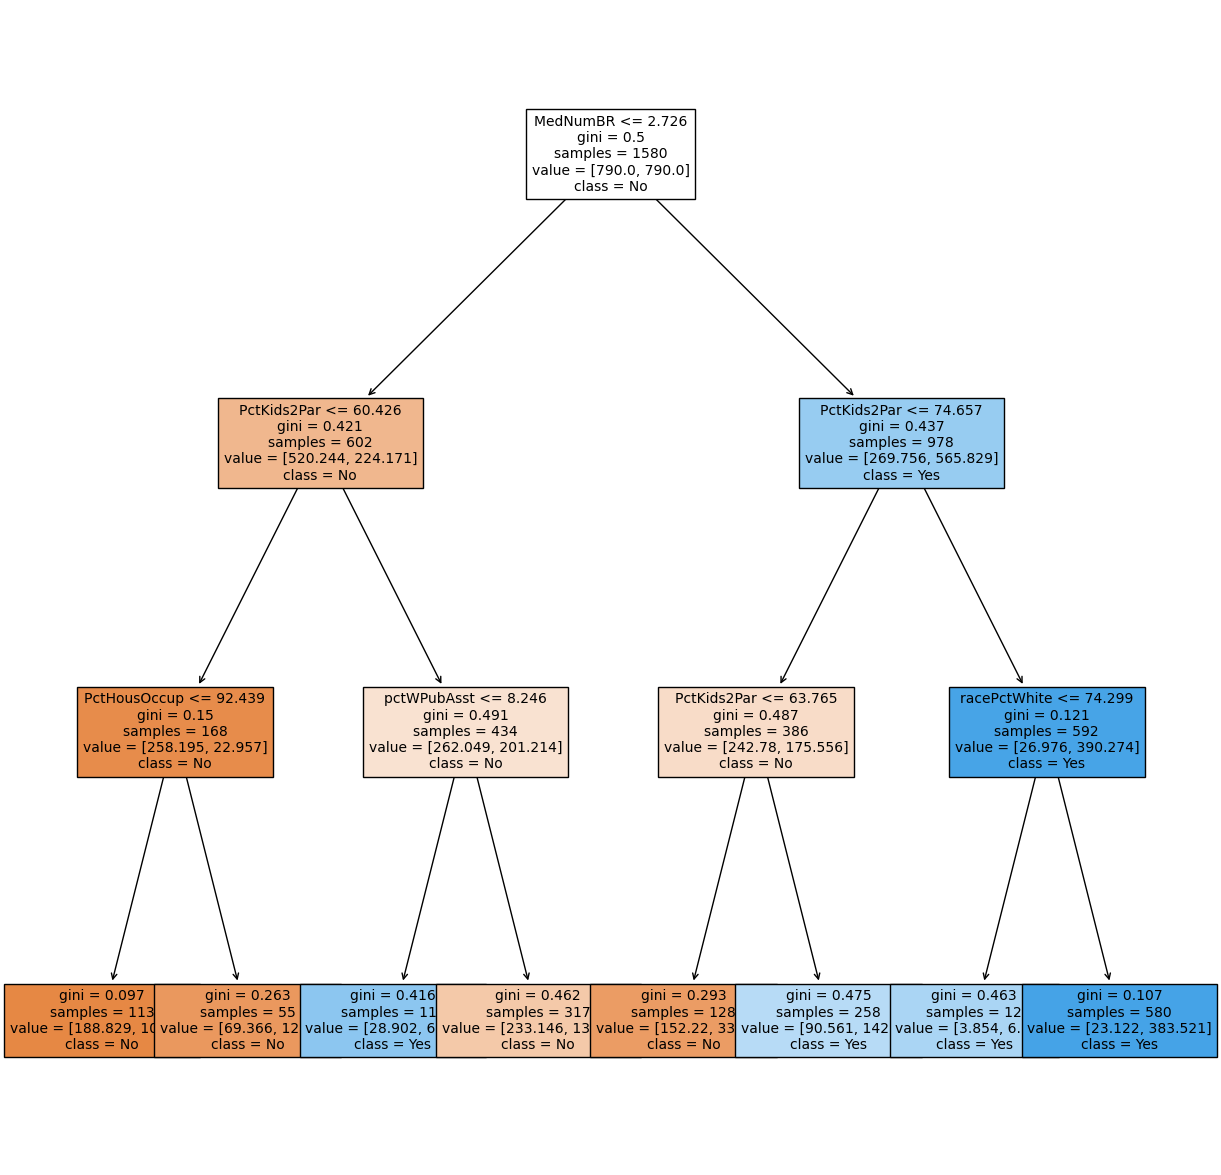

In [43]:
# Define and run a decision tree model with customizable parameters
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    # Initialize and train the decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=d, 
                                      class_weight=cw, 
                                      criterion=c, splitter=s, 
                                      min_samples_leaf=msl)
    
    # Train the classifier on the training data
    clf2 = clf.fit(X_train, y_train)

    # Plot the trained decision tree
    plt.figure(figsize=(15, 15))
    tree.plot_tree(clf2, 
                   feature_names=medFeatures, 
                   class_names=['No', 'Yes'], 
                   filled=True, 
                   fontsize=10)
    plt.show()

    # Predict and evaluate model performance on test data
    y_pred = clf2.predict(X_test)
    
    # Generate the classification report
    report = metrics.classification_report(y_test, y_pred)
    return report

# Run the model
classification_report = run_model()

In [44]:
# Perform 5-fold cross-validation for Decision Tree
clf_for_cv = tree.DecisionTreeClassifier(max_depth=3, class_weight='balanced', criterion='gini', splitter='random', min_samples_leaf=1)
clf_cv_scores = cross_val_score(clf_for_cv, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores and their average
print("Decision Tree Cross-Validation Scores (Accuracy):", clf_cv_scores)

Decision Tree Cross-Validation Scores (Accuracy): [0.81990521 0.7985782  0.79809976 0.74109264 0.79572447]


In [45]:
# Print the classification report in a separate cell
print(classification_report)
print("Average Accuracy for Decision Tree:", clf_cv_scores.mean())

                 precision    recall  f1-score   support

High Burglaries       0.53      0.84      0.65       117
 Low Burglaries       0.94      0.79      0.86       410

       accuracy                           0.80       527
      macro avg       0.74      0.81      0.76       527
   weighted avg       0.85      0.80      0.81       527

Average Accuracy for Decision Tree: 0.7906800553860702


In [46]:
# Drop 'BurgClass'
trim = trim.drop(columns=['BurgClass'])

In [47]:
# Convert 'burglPerPop' to float type
trim[['burglPerPop']] = trim[['burglPerPop']].astype(float)
trim.dtypes

racePctWhite         float64
medIncome              int64
pctWWage             float64
pctWInvInc           float64
pctWPubAsst          float64
medFamInc              int64
PctPopUnderPov       float64
PctNotHSGrad         float64
PctUnemployed        float64
TotalPctDiv          float64
PctKids2Par          float64
PctPersOwnOccup      float64
PctHousLess3BR       float64
MedNumBR               int64
PctHousOccup         float64
PctVacantBoarded     float64
PctWOFullPlumb       float64
MedRentPctHousInc    float64
burglPerPop          float64
dtype: object

In [48]:
def categorize_numerical_columns(df, features):
    # Create a copy of the DataFrame to avoid modifying the original
    df_categorized = pd.DataFrame()
    
    # Loop through each specified numerical column in the features list
    for column in features:
        # Calculate the quartiles
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.5)
        q3 = df[column].quantile(0.75)
        
        # Ensure unique bin edges to avoid duplicate bins
        bins = sorted(set([-float('inf'), q1, q2, q3, float('inf')]))  # Removing duplicates
        labels = ['Low', 'Medium-Low', 'Medium-High', 'High'][:len(bins) - 1]  # Adjusting labels to match bins

        # Create a categorical variable based on quartiles with unique bin edges
        df_categorized[column] = pd.cut(
            df[column],
            bins=bins,
            labels=labels,
            duplicates='drop'
        )
    
    return df_categorized

# Apply categorize_numerical_columns to 'medFeatures'
trim_categorized = categorize_numerical_columns(trim, medFeatures)

In [49]:
# Ensure burglPerPop is float type
trim['burglPerPop'] = trim['burglPerPop'].astype(float)

# Create a new column 'BurgClass' based on the 75th percentile threshold
threshold = trim['burglPerPop'].quantile(0.75)
trim['BurgClass'] = ['High Burglaries' if x >= threshold else 'Low Burglaries' for x in trim['burglPerPop']]

# Add the 'BurgClass' column to the categorized DataFrame
trim_categorized['BurgClass'] = trim['BurgClass'].reset_index(drop=True)

# Define the features and target variable for the first test
# We want to use the categorized columns as features
medFeatures = trim_categorized.columns.drop('BurgClass')  # Only keep the features, drop 'BurgClass'
target = 'BurgClass'

# Split the data into training and testing sets
X = trim_categorized[medFeatures]
y = trim_categorized[target]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
# Take a look at the data
trim_categorized.head()

,racePctWhite,medIncome,pctWWage,pctWInvInc,pctWPubAsst,PctPopUnderPov,PctNotHSGrad,PctUnemployed,TotalPctDiv,PctKids2Par,PctPersOwnOccup,PctHousLess3BR,MedNumBR,PctHousOccup,PctVacantBoarded,PctWOFullPlumb,MedRentPctHousInc,BurgClass
0,Medium-High,High,High,High,Low,Low,Low,Low,Low,High,High,Low,Medium-Low,High,Medium-High,Medium-Low,Low,Low Burglaries
1,Medium-High,High,Medium-High,High,Low,Low,Low,Low,Low,High,High,Low,Medium-Low,High,Low,Low,Medium-High,Low Burglaries
2,Medium-High,Medium-High,Medium-High,High,Low,Medium-Low,Low,Low,Medium-High,Medium-High,Medium-Low,Medium-High,Medium-Low,Medium-High,Medium-Low,Low,Low,Low Burglaries
4,Medium-Low,Low,Low,Medium-Low,High,High,Medium-High,High,Medium-Low,Low,Medium-Low,High,Low,Medium-Low,High,High,High,High Burglaries
5,Medium-High,Low,Medium-Low,Medium-Low,Medium-High,High,Medium-High,Medium-High,High,Medium-Low,Medium-Low,Medium-High,Low,Medium-Low,Medium-High,Medium-Low,Medium-High,Low Burglaries


In [51]:
# One-hot-encode 'trim_categorized'
trim_dummies = pd.get_dummies(trim_categorized, drop_first=False)

In [52]:
# Create the categorized 'medFeatures'
medFeatures = trim_dummies.drop(columns=['BurgClass_High Burglaries','BurgClass_Low Burglaries'])

In [53]:
# Split the data into training and testing sets
X = medFeatures
y = trim_dummies['BurgClass_High Burglaries']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [54]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize Gradient Boosting (no direct support for class_weight)
gbm_model = GradientBoostingClassifier(random_state=42)

# Compute sample weights for Gradient Boosting
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the Gradient Boosting model with sample weights
gbm_model.fit(X_train, y_train, sample_weight=sample_weights)

GradientBoostingClassifier(random_state=42)

In [55]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import make_scorer, accuracy_score

# Function to print classification metrics for Random Forest model
def print_rf_metrics(X_test, y_test, rf_model):
    """
    Print Random Forest classification metrics including accuracy and classification report.
    """
    # Generate predictions
    rf_predictions = rf_model.predict(X_test)

    # Print Random Forest metrics
    print("Random Forest Classification Metrics:")
    print("Accuracy:", accuracy_score(y_test, rf_predictions).round(3))
    print("")  # Add an empty line for readability
    print(classification_report(y_test, rf_predictions))

# Function to print classification metrics for Gradient Boosting model
def print_gbm_metrics(X_test, y_test, gbm_model):
    """
    Print Gradient Boosting classification metrics including accuracy and classification report.
    """
    # Generate predictions
    gbm_predictions = gbm_model.predict(X_test)

    # Print Gradient Boosting metrics
    print("Gradient Boosting Classification Metrics:")
    print("Accuracy:", accuracy_score(y_test, gbm_predictions).round(3))
    print("")  # Add an empty line for readability
    print(classification_report(y_test, gbm_predictions))

In [56]:
# Define accuracy as the scoring metric for cross-validation
accuracy_scorer = make_scorer(accuracy_score)

# Run cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring=accuracy_scorer)
print("Random Forest Cross-Validation Scores (Accuracy):", rf_cv_scores)

# Run cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gbm_model, X, y, cv=5, scoring=accuracy_scorer)
print("Gradient Boosting Cross-Validation Scores (Accuracy):", gb_cv_scores)

Random Forest Cross-Validation Scores (Accuracy): [0.74881517 0.73696682 0.74821853 0.74821853 0.74346793]
Gradient Boosting Cross-Validation Scores (Accuracy): [0.7535545  0.76303318 0.75296912 0.74821853 0.76009501]


In [57]:
# Print metrics for the Random Forest model
print_rf_metrics(X_test, y_test, rf_model)
print("Average Accuracy for Random Forest:", np.mean(rf_cv_scores))
print("")
print("")
print("")

# Print metrics for the Gradient Boosting model
print_gbm_metrics(X_test, y_test, gbm_model)
print("Average Accuracy for Gradient Boosting:", np.mean(gb_cv_scores))

Random Forest Classification Metrics:
Accuracy: 0.748

              precision    recall  f1-score   support

       False       0.77      0.96      0.85       405
        True       0.21      0.03      0.06       122

    accuracy                           0.75       527
   macro avg       0.49      0.50      0.46       527
weighted avg       0.64      0.75      0.67       527

Average Accuracy for Random Forest: 0.7451373957289685



Gradient Boosting Classification Metrics:
Accuracy: 0.573

              precision    recall  f1-score   support

       False       0.77      0.63      0.69       405
        True       0.24      0.39      0.29       122

    accuracy                           0.57       527
   macro avg       0.51      0.51      0.49       527
weighted avg       0.65      0.57      0.60       527

Average Accuracy for Gradient Boosting: 0.755574067611532


In [58]:
trim_categorized.head()

,racePctWhite,medIncome,pctWWage,pctWInvInc,pctWPubAsst,PctPopUnderPov,PctNotHSGrad,PctUnemployed,TotalPctDiv,PctKids2Par,PctPersOwnOccup,PctHousLess3BR,MedNumBR,PctHousOccup,PctVacantBoarded,PctWOFullPlumb,MedRentPctHousInc,BurgClass
0,Medium-High,High,High,High,Low,Low,Low,Low,Low,High,High,Low,Medium-Low,High,Medium-High,Medium-Low,Low,Low Burglaries
1,Medium-High,High,Medium-High,High,Low,Low,Low,Low,Low,High,High,Low,Medium-Low,High,Low,Low,Medium-High,Low Burglaries
2,Medium-High,Medium-High,Medium-High,High,Low,Medium-Low,Low,Low,Medium-High,Medium-High,Medium-Low,Medium-High,Medium-Low,Medium-High,Medium-Low,Low,Low,Low Burglaries
4,Medium-Low,Low,Low,Medium-Low,High,High,Medium-High,High,Medium-Low,Low,Medium-Low,High,Low,Medium-Low,High,High,High,High Burglaries
5,Medium-High,Low,Medium-Low,Medium-Low,Medium-High,High,Medium-High,Medium-High,High,Medium-Low,Medium-Low,Medium-High,Low,Medium-Low,Medium-High,Medium-Low,Medium-High,Low Burglaries


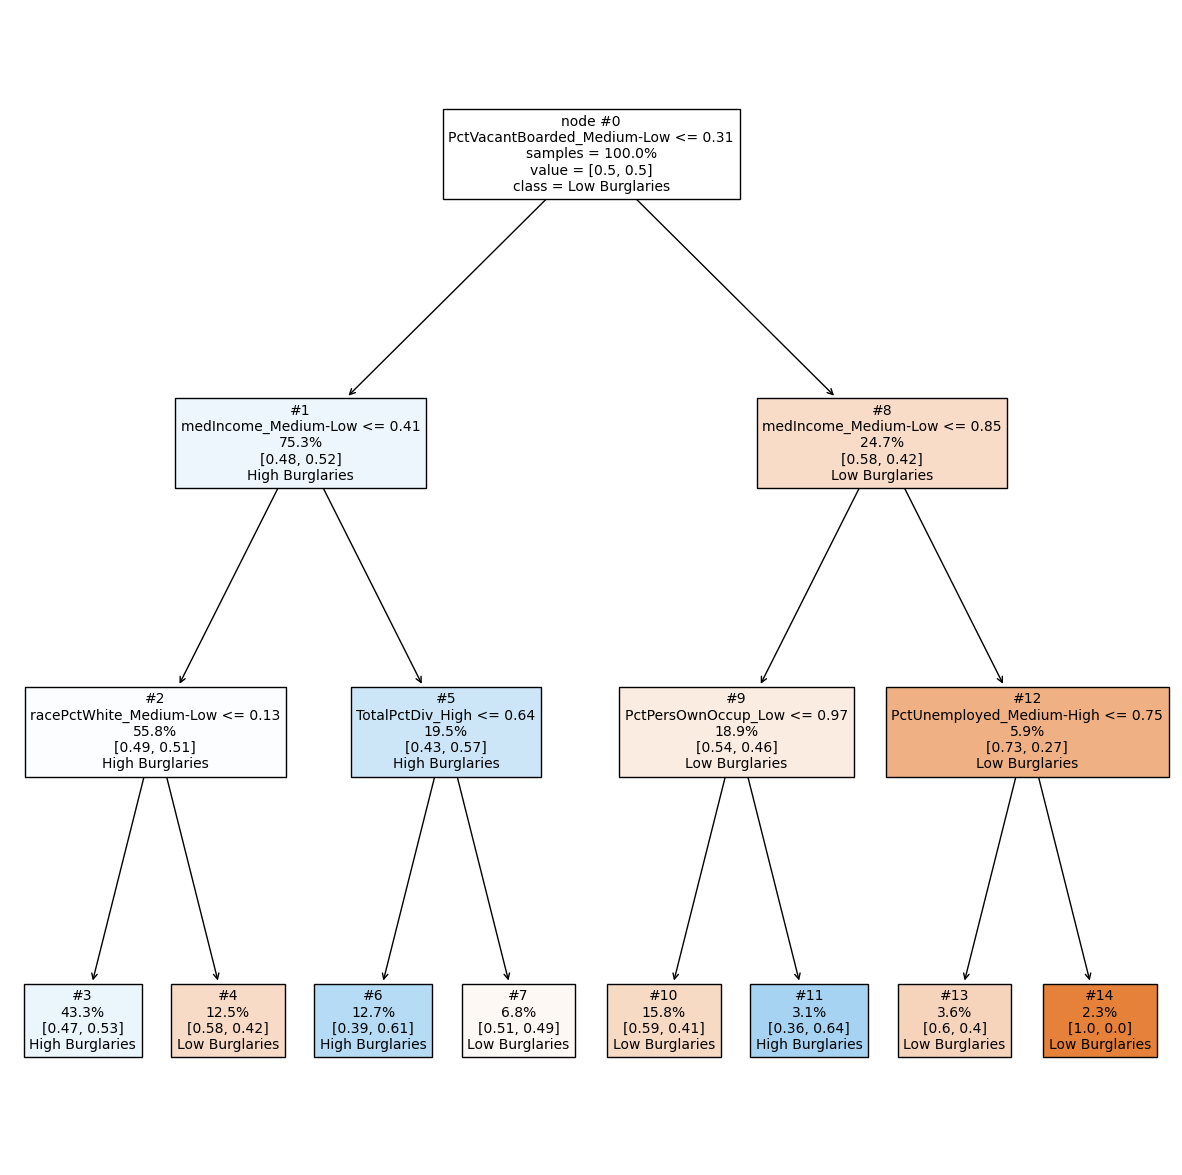

In [59]:
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    """
    Train and evaluate a decision tree classifier with the provided parameters.
    """
    try:
        # Initialize and train the decision tree classifier
        clf = tree.DecisionTreeClassifier(max_depth=d,
                                           class_weight=cw,
                                           criterion=c,
                                           splitter=s,
                                           min_samples_leaf=msl)
        clf2 = clf.fit(X_train, y_train)

        # Plot the trained decision tree
        plt.figure(figsize=(15, 15))
        tree.plot_tree(clf2,
                       feature_names=X_train.columns.tolist(),
                       class_names=['Low Burglaries', 'High Burglaries'],
                       filled=True, precision=2,
                       node_ids=True, fontsize=10,
                       label='root', proportion=True,
                       impurity=False)
        plt.show()

        # Make predictions
        y_pred = clf2.predict(X_test)

        # Generate and return the classification report
        report = metrics.classification_report(y_test, y_pred)
        return report

    except Exception as e:
        # Handle any errors that occur during model training or evaluation
        print(f"An error occurred: {e}")
        return None

# Run the model and save the classification report
classification_report = run_model()

In [60]:
# Perform 5-fold cross-validation for Decision Tree
clf_for_cv = tree.DecisionTreeClassifier(max_depth=3, class_weight='balanced', criterion='gini', splitter='random', min_samples_leaf=1)
clf_cv_scores = cross_val_score(clf_for_cv, X, y, cv=5, scoring='accuracy')
print("\nDecision Tree Cross-Validation Scores (Accuracy):", clf_cv_scores)


Decision Tree Cross-Validation Scores (Accuracy): [0.66113744 0.60189573 0.52494062 0.60807601 0.39192399]


In [61]:
print(classification_report)
print("Average Accuracy for Decision Tree:", clf_cv_scores.mean())

              precision    recall  f1-score   support

       False       0.73      0.44      0.55       405
        True       0.20      0.46      0.28       122

    accuracy                           0.44       527
   macro avg       0.46      0.45      0.41       527
weighted avg       0.61      0.44      0.48       527

Average Accuracy for Decision Tree: 0.5575947585865295


In [62]:
# Categorize numerical columns in the DataFrame
trim_categorized = categorize_numerical_columns(trim, medFamFeatures)

# Add the 'BurgClass' column back to the categorized DataFrame for classification
trim_categorized['BurgClass'] = trim['BurgClass'].reset_index(drop=True)

# Define the features and target variable for the first test
medFamFeatures = trim_categorized.columns.drop('BurgClass')  # Keep only feature columns, excluding 'BurgClass'
target = 'BurgClass'

# Split the data into training and testing sets
X = trim_categorized[medFamFeatures]
y = trim_categorized[target]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
# Convert categorical variables in the DataFrame to one-hot encoded dummy variables
trim_dummies = pd.get_dummies(trim_categorized, drop_first=False)

In [64]:
# Define the feature set by dropping specific target class columns from the one-hot encoded DataFrame
medFamFeatures = trim_dummies.drop(columns=['BurgClass_High Burglaries', 'BurgClass_Low Burglaries'])

In [65]:
# Split the data into training and testing sets
X = medFamFeatures
y = trim_dummies['BurgClass_High Burglaries']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [66]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize Gradient Boosting (no direct support for class_weight)
gbm_model = GradientBoostingClassifier(random_state=42)

# Compute sample weights for Gradient Boosting
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the Gradient Boosting model with sample weights
gbm_model.fit(X_train, y_train, sample_weight=sample_weights)

GradientBoostingClassifier(random_state=42)

In [67]:
from sklearn.metrics import classification_report, accuracy_score

def print_rf_metrics(X_test, y_test, rf_model):
    """
    Print Random Forest classification metrics including accuracy and classification report.
    """
    # Generate predictions
    rf_predictions = rf_model.predict(X_test)

    # Print Random Forest metrics
    print("Random Forest Classification Metrics:")
    print("Accuracy:", accuracy_score(y_test, rf_predictions).round(3))
    print("")  # Add an empty line for readability
    print(classification_report(y_test, rf_predictions))

# Function to print classification metrics for Gradient Boosting model
def print_gbm_metrics(X_test, y_test, gbm_model):
    """
    Print Gradient Boosting classification metrics including accuracy and classification report.
    """
    # Generate predictions
    gbm_predictions = gbm_model.predict(X_test)

    # Print Gradient Boosting metrics
    print("Gradient Boosting Classification Metrics:")
    print("Accuracy:", accuracy_score(y_test, gbm_predictions).round(3))
    print("")  # Add an empty line for readability
    print(classification_report(y_test, gbm_predictions))

In [68]:
# Define accuracy as the scoring metric for cross-validation
accuracy_scorer = make_scorer(accuracy_score)

# Run cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring=accuracy_scorer)
print("Random Forest Cross-Validation Scores (Accuracy):", rf_cv_scores)

# Run cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gbm_model, X, y, cv=5, scoring=accuracy_scorer)
print("Gradient Boosting Cross-Validation Scores (Accuracy):", gb_cv_scores)

Random Forest Cross-Validation Scores (Accuracy): [0.73696682 0.74407583 0.73159145 0.74584323 0.74821853]
Gradient Boosting Cross-Validation Scores (Accuracy): [0.7535545  0.75592417 0.75059382 0.75771971 0.75296912]


In [69]:
# Print metrics for the Random Forest model
print_rf_metrics(X_test, y_test, rf_model)
print("Average Accuracy for Random Forest:", np.mean(rf_cv_scores))
print("")
print("")
print("")

# Print metrics for the Gradient Boosting model
print_gbm_metrics(X_test, y_test, gbm_model)
print("Average Accuracy for Gradient Boosting:", np.mean(gb_cv_scores))

Random Forest Classification Metrics:
Accuracy: 0.736

              precision    recall  f1-score   support

       False       0.75      0.97      0.85       394
        True       0.29      0.03      0.05       133

    accuracy                           0.74       527
   macro avg       0.52      0.50      0.45       527
weighted avg       0.63      0.74      0.65       527

Average Accuracy for Random Forest: 0.7413391721358535



Gradient Boosting Classification Metrics:
Accuracy: 0.575

              precision    recall  f1-score   support

       False       0.74      0.66      0.70       394
        True       0.24      0.32      0.27       133

    accuracy                           0.57       527
   macro avg       0.49      0.49      0.49       527
weighted avg       0.61      0.57      0.59       527

Average Accuracy for Gradient Boosting: 0.7541522666636646


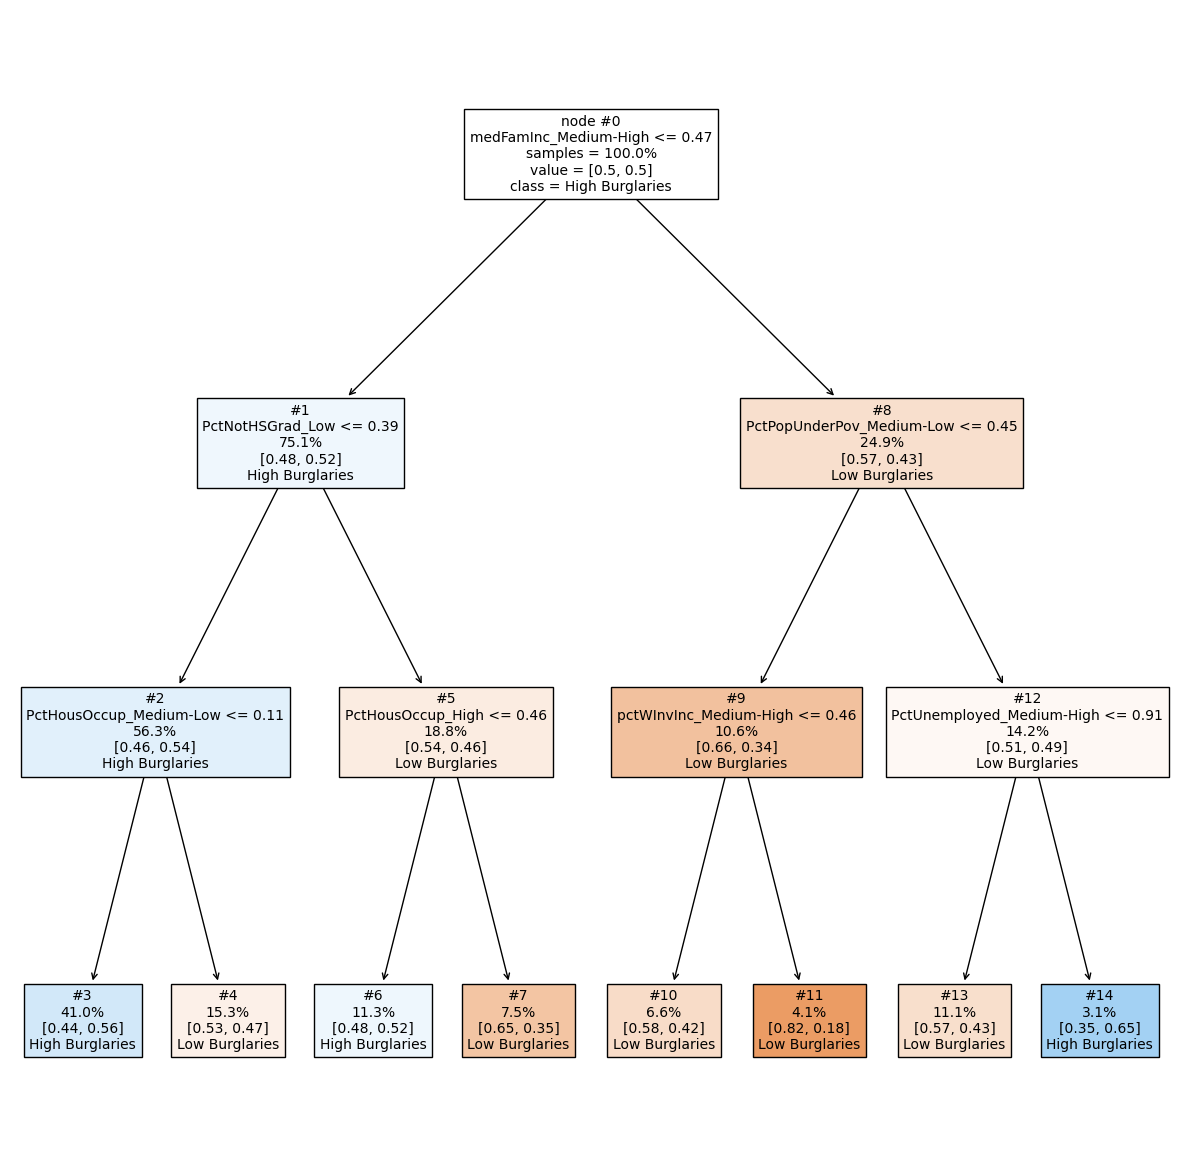

In [70]:
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    """
    Train and evaluate a decision tree classifier with the provided parameters.
    """
    try:
        # Initialize and train the decision tree classifier
        clf = tree.DecisionTreeClassifier(max_depth=d,
                                           class_weight=cw,
                                           criterion=c,
                                           splitter=s,
                                           min_samples_leaf=msl)
        clf2 = clf.fit(X_train, y_train)

        # Plot the trained decision tree
        plt.figure(figsize=(15, 15))
        tree.plot_tree(clf2,
                       feature_names=X_train.columns.tolist(),
                       class_names=['Low Burglaries', 'High Burglaries'],
                       filled=True, precision=2,
                       node_ids=True, fontsize=10,
                       label='root', proportion=True,
                       impurity=False)
        plt.show()

        # Make predictions
        y_pred = clf2.predict(X_test)

        # Generate and return the classification report
        report = metrics.classification_report(y_test, y_pred)
        return report

    except Exception as e:
        # Handle any errors that occur during model training or evaluation
        print(f"An error occurred: {e}")
        return None

# Run the model and save the classification report
classification_report = run_model()

In [71]:
# Perform 5-fold cross-validation for Decision Tree
clf_for_cv = tree.DecisionTreeClassifier(max_depth=3, class_weight='balanced', criterion='gini', splitter='random', min_samples_leaf=1)
clf_cv_scores = cross_val_score(clf_for_cv, X, y, cv=5, scoring='accuracy')
print("\nDecision Tree Cross-Validation Scores (Accuracy):", clf_cv_scores)


Decision Tree Cross-Validation Scores (Accuracy): [0.41469194 0.60189573 0.35629454 0.59857482 0.48218527]


In [72]:
print(classification_report)
print("Average Accuracy for Decision Tree:", clf_cv_scores.mean())

              precision    recall  f1-score   support

       False       0.72      0.44      0.55       394
        True       0.23      0.50      0.32       133

    accuracy                           0.46       527
   macro avg       0.48      0.47      0.43       527
weighted avg       0.60      0.46      0.49       527

Average Accuracy for Decision Tree: 0.4907284619108195


In [73]:
# Set up for a correlation test, to see if an area's turnover is corrlated with its burglary rates
corrtest = places.drop(columns=['racePctWhite', 'medIncome', 'pctWWage', 'pctWInvInc', 'pctWPubAsst',
       'PctPopUnderPov', 'PctNotHSGrad', 'PctUnemployed',
       'TotalPctDiv', 'PctKids2Par', 'PctPersOwnOccup', 'PctHousLess3BR',
       'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'PctWOFullPlumb',
       'MedRentPctHousInc'])

In [74]:
# Test correlation
corrtest.corr()

,medFamInc,PctSameHouse85,PctSameCity85,PctSameState85,burglPerPop
medFamInc,1.000000,0.230612,-0.023574,-0.047111,-0.420148
PctSameHouse85,0.230612,1.000000,0.804595,0.656415,-0.204957
PctSameCity85,-0.023574,0.804595,1.000000,0.725802,0.010459
PctSameState85,-0.047111,0.656415,0.725802,1.000000,-0.060021
burglPerPop,-0.420148,-0.204957,0.010459,-0.060021,1.000000


## Places where people don't move have more burglaries

In [75]:
# Convert 'burglPerPop' into float type
places[['burglPerPop']] = places[['burglPerPop']].astype(float)

In [76]:
# Drop the less correlated columns
places.drop(columns=["PctSameCity85", "PctSameState85"], inplace=True)

In [77]:
places.drop(columns = ['medIncome'])

,racePctWhite,pctWWage,pctWInvInc,pctWPubAsst,medFamInc,PctPopUnderPov,PctNotHSGrad,PctUnemployed,TotalPctDiv,PctKids2Par,PctPersOwnOccup,PctHousLess3BR,MedNumBR,PctHousOccup,PctVacantBoarded,PctWOFullPlumb,MedRentPctHousInc,PctSameHouse85,burglPerPop
0,91.78,89.24,70.20,1.03,79584,1.96,9.90,2.70,4.47,90.17,91.46,11.06,3,98.37,3.12,0.28,23.8,65.29,114.85
1,95.57,78.99,64.11,2.75,55323,3.98,13.72,2.43,5.42,85.33,89.03,23.60,3,97.15,0.00,0.14,27.6,71.27,242.37
2,94.33,82.00,55.73,2.94,42112,4.75,9.09,4.01,12.55,78.85,64.18,47.46,3,95.68,0.92,0.12,24.1,36.60,758.14
4,89.16,69.33,42.82,11.21,24018,29.99,23.06,9.08,9.73,55.20,58.13,55.64,2,92.45,3.90,0.82,32.2,42.22,728.93
5,95.65,75.78,41.15,7.12,27705,17.78,23.03,5.72,13.04,69.79,57.81,53.19,2,91.81,2.09,0.31,26.4,42.29,1386.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,61.68,75.05,31.42,19.98,27388,25.06,30.87,9.99,13.34,64.81,41.69,57.23,2,96.40,1.46,0.55,29.8,39.19,2268.72
2211,76.65,75.06,33.25,8.85,25000,20.79,27.71,7.90,13.77,63.66,56.06,54.48,2,89.72,4.59,0.12,23.8,49.12,860.43
2212,92.62,59.79,44.72,9.01,34973,7.56,26.14,5.18,11.23,74.20,74.61,61.03,2,93.30,0.84,0.27,30.5,46.73,1709.26
2213,69.91,71.67,21.94,13.05,22103,30.32,39.63,12.12,12.48,63.45,60.11,50.28,2,85.39,5.61,0.87,26.2,54.05,1508.01


In [78]:
places.columns

Index(['racePctWhite', 'medIncome', 'pctWWage', 'pctWInvInc', 'pctWPubAsst',
       'medFamInc', 'PctPopUnderPov', 'PctNotHSGrad', 'PctUnemployed',
       'TotalPctDiv', 'PctKids2Par', 'PctPersOwnOccup', 'PctHousLess3BR',
       'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'PctWOFullPlumb',
       'MedRentPctHousInc', 'PctSameHouse85', 'burglPerPop'],
      dtype='object')

In [79]:
places2 = places.copy()

In [80]:
medFamFeatures = places.drop(columns=["burglPerPop"])

In [81]:
def categorize_numerical_columns(df, features):
    # Create a copy of the DataFrame to avoid modifying the original
    df_categorized = pd.DataFrame()
    
    # Loop through each specified numerical column in the features list
    for column in features:
        # Calculate the quartiles
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.5)
        q3 = df[column].quantile(0.75)
        
        # Ensure unique bin edges to avoid duplicate bins
        bins = sorted(set([-float('inf'), q1, q2, q3, float('inf')]))  # Removing duplicates
        labels = ['Low', 'Medium-Low', 'Medium-High', 'High'][:len(bins) - 1]  # Adjusting labels to match bins

        # Create a categorical variable based on quartiles with unique bin edges
        df_categorized[column] = pd.cut(
            df[column],
            bins=bins,
            labels=labels,
            duplicates='drop'
        )
    
    return df_categorized

# Apply categorize_numerical_columns to 'medFeatures'
places_categorized = categorize_numerical_columns(places, medFamFeatures)

In [82]:
# Ensure burglPerPop is float type for accurate calculations
places['burglPerPop'] = places['burglPerPop'].astype(float)

# Create a new column 'BurgClass' based on the 75th percentile threshold for burglary classification
threshold = places['burglPerPop'].quantile(0.75)
places['BurgClass'] = ['High Burglaries' if x >= threshold else 'Low Burglaries' for x in places['burglPerPop']]

# Categorize numerical columns using the predefined function
places_categorized = categorize_numerical_columns(places, medFamFeatures)

# Ensure that both DataFrames have the same index
# Add the 'BurgClass' column directly from the original DataFrame
places_categorized['BurgClass'] = places['BurgClass'].values  # Use .values to align indices

# Convert 'BurgClass' to categorical type for better handling
places_categorized['BurgClass'] = places_categorized['BurgClass'].astype('category')

# If you want to encode 'BurgClass' as numerical values for modeling
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'BurgClass' column
places_categorized['BurgClass'] = le.fit_transform(places_categorized['BurgClass'])

# Define features and target variable for the model training
medFamFeatures = places_categorized.columns.drop('BurgClass')  # Keep only features, exclude 'BurgClass'
target = 'BurgClass'

In [83]:
places_categorized.head()

,racePctWhite,medIncome,pctWWage,pctWInvInc,pctWPubAsst,medFamInc,PctPopUnderPov,PctNotHSGrad,PctUnemployed,TotalPctDiv,PctKids2Par,PctPersOwnOccup,PctHousLess3BR,MedNumBR,PctHousOccup,PctVacantBoarded,PctWOFullPlumb,MedRentPctHousInc,PctSameHouse85,BurgClass
0,Medium-High,High,High,High,Low,High,Low,Low,Low,Low,High,High,Low,Medium-Low,High,Medium-High,Medium-Low,Low,High,1
1,Medium-High,High,Medium-High,High,Low,High,Low,Low,Low,Low,High,High,Low,Medium-Low,High,Low,Low,Medium-High,High,1
2,Medium-High,Medium-High,Medium-High,High,Low,Medium-High,Medium-Low,Low,Low,Medium-High,Medium-High,Medium-Low,Medium-High,Medium-Low,Medium-High,Medium-Low,Low,Low,Low,1
4,Medium-Low,Low,Low,Medium-Low,High,Low,High,Medium-High,High,Medium-Low,Low,Medium-Low,High,Low,Medium-Low,High,High,High,Low,1
5,Medium-High,Low,Medium-Low,Medium-Low,Medium-High,Low,High,Medium-High,Medium-High,High,Medium-Low,Medium-Low,Medium-High,Low,Medium-Low,Medium-High,Medium-Low,Medium-High,Low,0


In [84]:
# One-hot-encode the categorized DataFrame
places_dummies = pd.get_dummies(places_categorized, drop_first=False)

In [85]:
# Split the data into features (X) and target (y) after one-hot encoding
X = places_dummies.drop(columns='BurgClass')  # Use all features except 'BurgClass'
y = places_dummies['BurgClass']  # Use the encoded BurgClass as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize Gradient Boosting (no direct support for class_weight)
gbm_model = GradientBoostingClassifier(random_state=42)

# Compute sample weights for Gradient Boosting
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the Gradient Boosting model with sample weights
gbm_model.fit(X_train, y_train, sample_weight=sample_weights)

GradientBoostingClassifier(random_state=42)

In [87]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import make_scorer, accuracy_score

# Function to print classification metrics for Random Forest model
def print_rf_metrics(X_test, y_test, rf_model):
    """
    Print Random Forest classification metrics including accuracy and classification report.
    """
    # Generate predictions
    rf_predictions = rf_model.predict(X_test)

    # Print Random Forest metrics
    print("Random Forest Classification Metrics:")
    print("Accuracy:", accuracy_score(y_test, rf_predictions).round(3))
    print("")  # Add an empty line for readability
    print(classification_report(y_test, rf_predictions))

# Function to print classification metrics for Gradient Boosting model
def print_gbm_metrics(X_test, y_test, gbm_model):
    """
    Print Gradient Boosting classification metrics including accuracy and classification report.
    """
    # Generate predictions
    gbm_predictions = gbm_model.predict(X_test)

    # Print Gradient Boosting metrics
    print("Gradient Boosting Classification Metrics:")
    print("Accuracy:", accuracy_score(y_test, gbm_predictions).round(3))
    print("")  # Add an empty line for readability
    print(classification_report(y_test, gbm_predictions))

In [88]:
# Define accuracy as the scoring metric for cross-validation
accuracy_scorer = make_scorer(accuracy_score)

# Run cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring=accuracy_scorer)
print("Random Forest Cross-Validation Scores (Accuracy):", rf_cv_scores)

# Run cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gbm_model, X, y, cv=5, scoring=accuracy_scorer)
print("Gradient Boosting Cross-Validation Scores (Accuracy):", gb_cv_scores)

Random Forest Cross-Validation Scores (Accuracy): [0.86729858 0.85545024 0.85035629 0.83135392 0.82422803]
Gradient Boosting Cross-Validation Scores (Accuracy): [0.86018957 0.8507109  0.85985748 0.81235154 0.83372922]


In [89]:
# Print metrics for the Random Forest model
print_rf_metrics(X_test, y_test, rf_model)
print("Average Accuracy for Random Forest:", np.mean(rf_cv_scores))

# Print metrics for the Gradient Boosting model
print_gbm_metrics(X_test, y_test, gbm_model)
print("Average Accuracy for Gradient Boosting:", np.mean(gb_cv_scores))

Random Forest Classification Metrics:
Accuracy: 0.813

              precision    recall  f1-score   support

           0       0.66      0.58      0.61       109
           1       0.86      0.89      0.88       313

    accuracy                           0.81       422
   macro avg       0.76      0.74      0.75       422
weighted avg       0.81      0.81      0.81       422

Average Accuracy for Random Forest: 0.8457374114892324
Gradient Boosting Classification Metrics:
Accuracy: 0.818

              precision    recall  f1-score   support

           0       0.61      0.80      0.69       109
           1       0.92      0.82      0.87       313

    accuracy                           0.82       422
   macro avg       0.77      0.81      0.78       422
weighted avg       0.84      0.82      0.82       422

Average Accuracy for Gradient Boosting: 0.8433677432427868


In [90]:
# Get feature importances
importances = gbm_model.feature_importances_

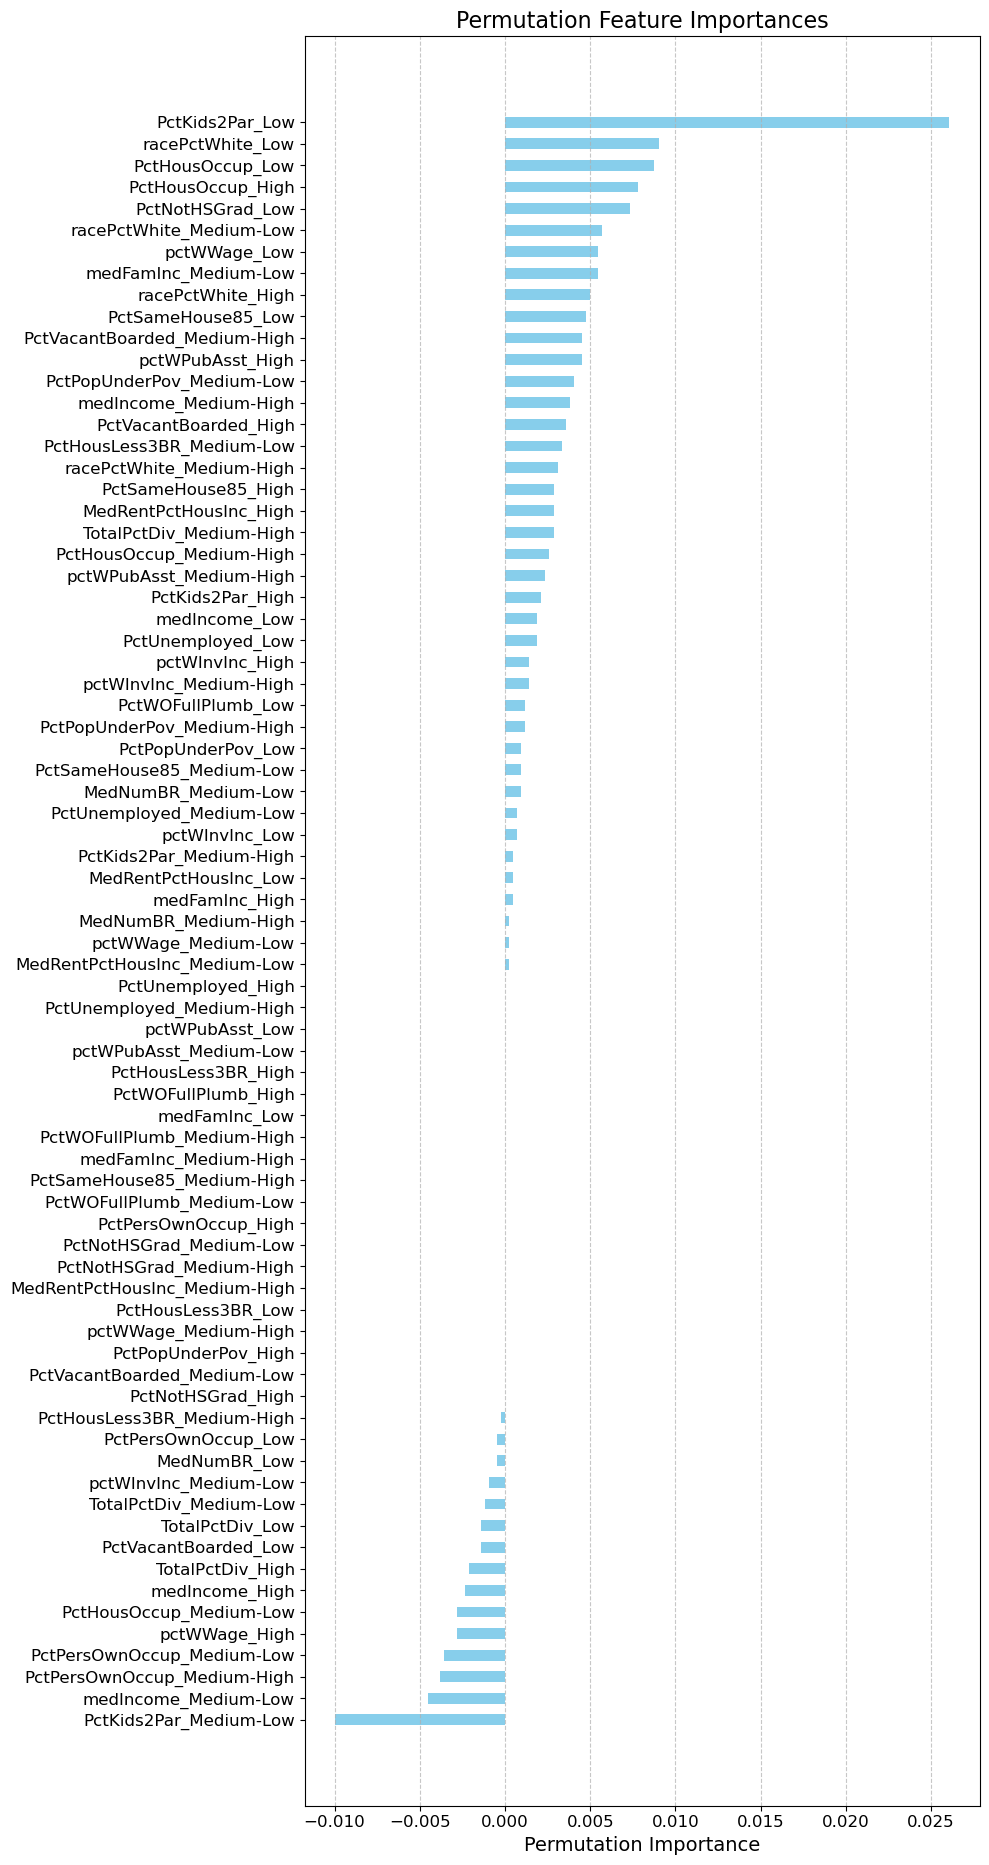

In [91]:
from sklearn.inspection import permutation_importance

# Assuming `X` is a DataFrame or you have column names in a list
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]

# Verify number of feature names matches the number of features
if len(feature_names) != len(gbm_model.feature_importances_):
    raise ValueError("Mismatch between number of feature names and model features!")

# Compute permutation importance
perm_importance = permutation_importance(gbm_model, X_test, y_test, n_repeats=10, random_state=42)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Adjust figure size and bar height for extra spacing
plt.figure(figsize=(10, len(sorted_idx) * 0.25))  # Height scales with number of features
plt.barh(
    np.arange(len(sorted_idx)), 
    perm_importance.importances_mean[sorted_idx], 
    color="skyblue", 
    align="center", 
    height=0.5  # Very narrow bars for extra spacing
)
plt.yticks(
    np.arange(len(sorted_idx)), 
    np.array(feature_names)[sorted_idx], 
    fontsize=12
)
plt.xlabel("Permutation Importance", fontsize=14)
plt.title("Permutation Feature Importances", fontsize=16)
plt.xticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Adjust layout to add extra space for labels
plt.subplots_adjust(left=0.4)  # Increase left margin for longer labels
plt.tight_layout()  # Adjust overall layout to fit everything
plt.show()

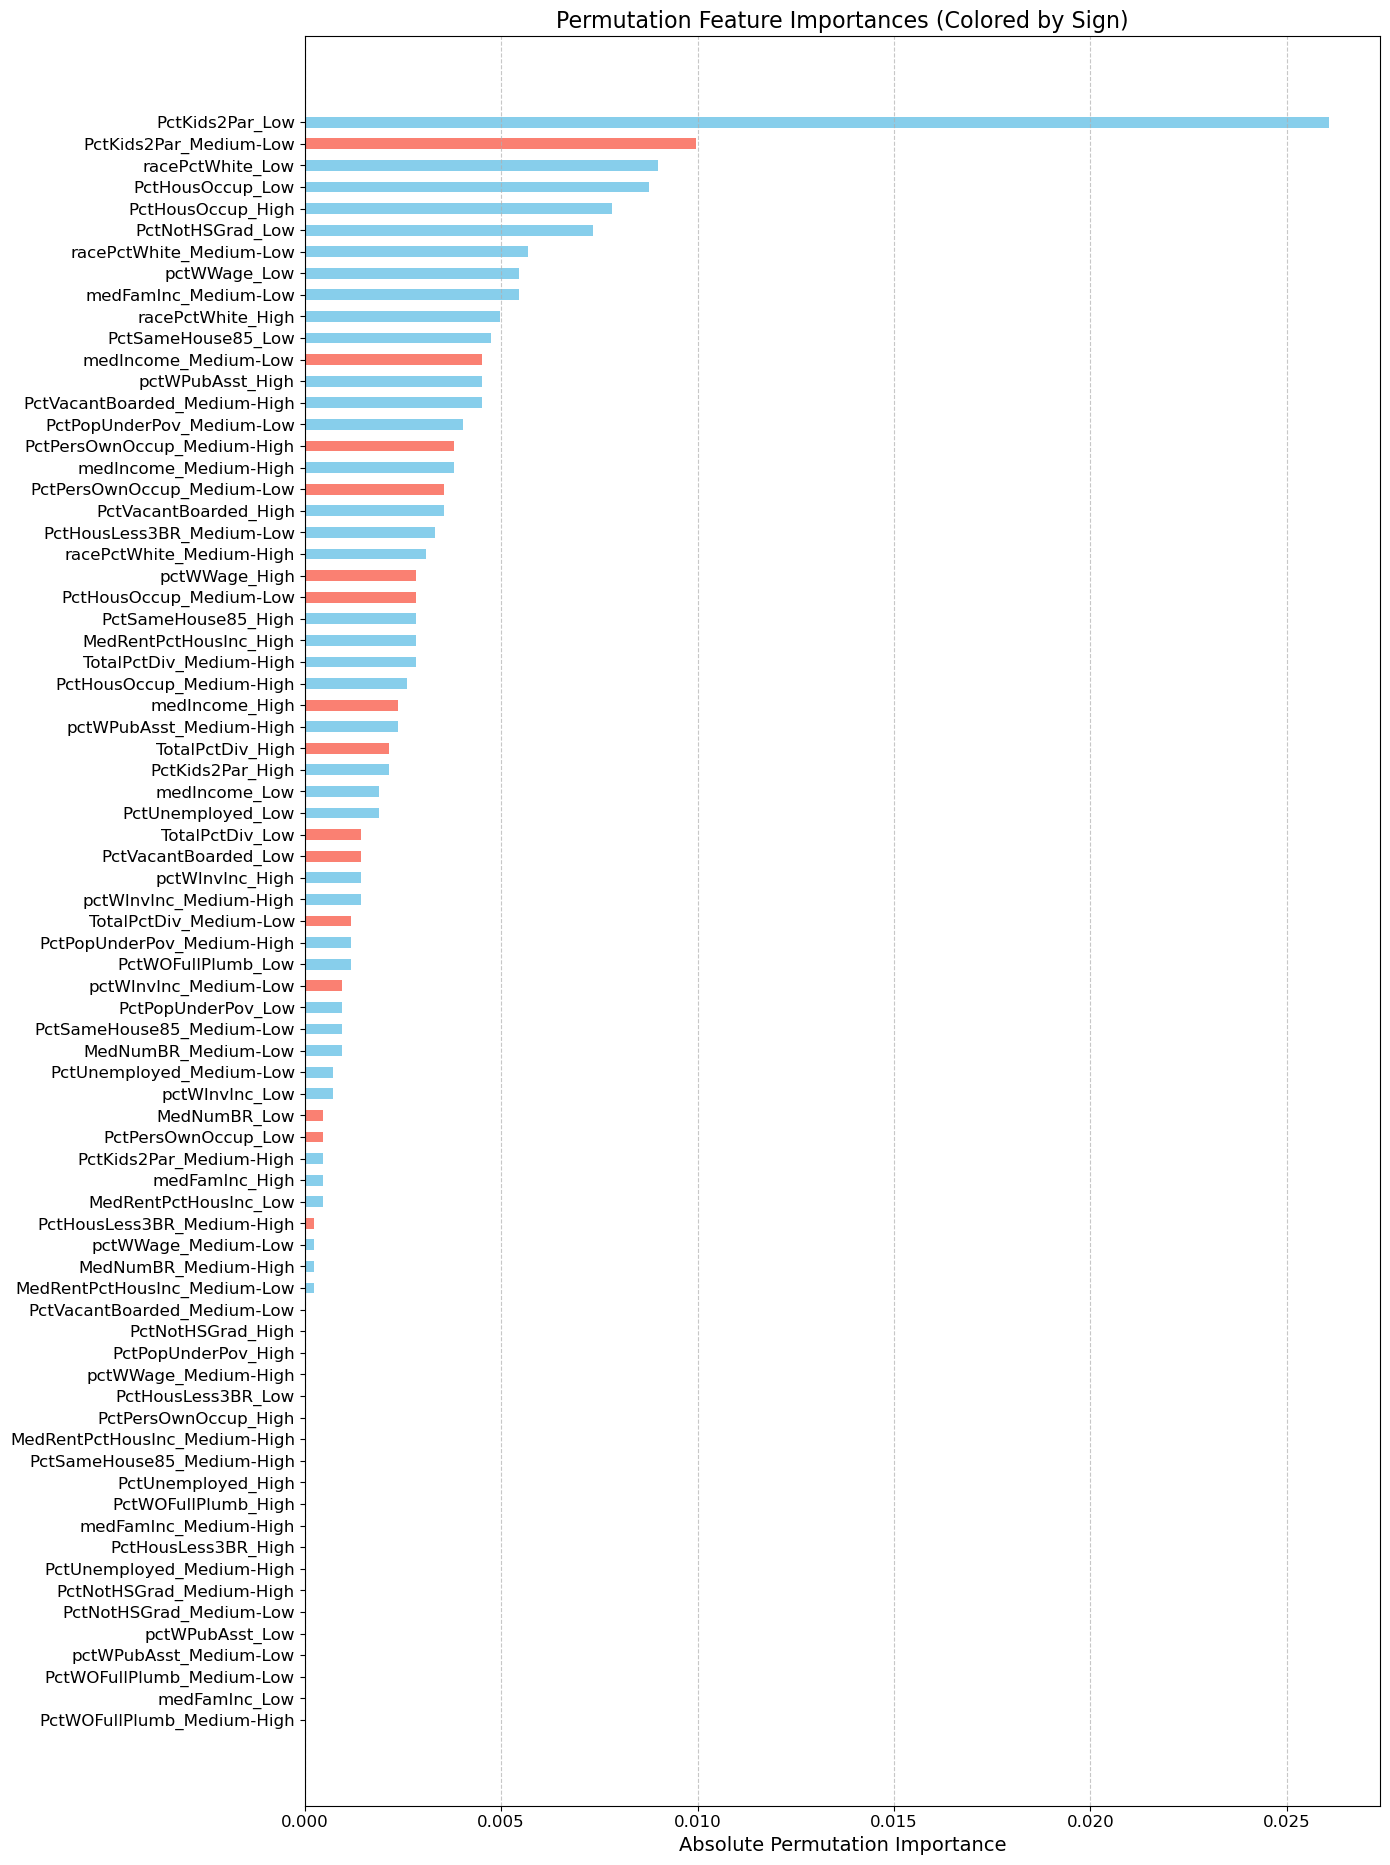

In [95]:
import matplotlib.colors as mcolors

# Assuming `X` is a DataFrame or you have column names in a list
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]

# Verify number of feature names matches the number of features
if len(feature_names) != len(gbm_model.feature_importances_):
    raise ValueError("Mismatch between number of feature names and model features!")

# Compute permutation importance
perm_importance = permutation_importance(gbm_model, X_test, y_test, n_repeats=10, random_state=42)

# Get importances and their absolute values
perm_importance_mean = perm_importance.importances_mean
perm_importance_mean_abs = np.abs(perm_importance_mean)

# Sort features by absolute importance
sorted_idx = perm_importance_mean_abs.argsort()

# Create colors based on the sign of importance
colors = np.where(perm_importance_mean[sorted_idx] >= 0, "skyblue", "salmon")  # Blue for positive, red for negative

# Adjust figure size and bar height for extra spacing
plt.figure(figsize=(14, len(sorted_idx) * 0.25))  # Height scales with number of features
plt.barh(
    np.arange(len(sorted_idx)), 
    perm_importance_mean_abs[sorted_idx],  # Use absolute values for bar lengths
    color=colors,  # Set color based on sign
    align="center", 
    height=0.5  # Narrow bars for spacing
)
plt.yticks(
    np.arange(len(sorted_idx)), 
    np.array(feature_names)[sorted_idx], 
    fontsize=12
)
plt.xlabel("Absolute Permutation Importance", fontsize=14)  # Update label for clarity
plt.title("Permutation Feature Importances (Colored by Sign)", fontsize=16)
plt.xticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Adjust layout to add extra space for labels
plt.subplots_adjust(left=0.4)  # Increase left margin for longer labels
plt.tight_layout()  # Adjust overall layout to fit everything
plt.show()

In [96]:
places2.columns

Index(['racePctWhite', 'medIncome', 'pctWWage', 'pctWInvInc', 'pctWPubAsst',
       'medFamInc', 'PctPopUnderPov', 'PctNotHSGrad', 'PctUnemployed',
       'TotalPctDiv', 'PctKids2Par', 'PctPersOwnOccup', 'PctHousLess3BR',
       'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'PctWOFullPlumb',
       'MedRentPctHousInc', 'PctSameHouse85', 'burglPerPop'],
      dtype='object')

In [97]:
# Define the features and target variable using AvgIncome
medFamFeatures = ['racePctWhite', 'medIncome', 'pctWWage', 'pctWInvInc', 'pctWPubAsst',
       'medFamInc', 'PctPopUnderPov', 'PctNotHSGrad', 'PctUnemployed',
       'TotalPctDiv', 'PctKids2Par', 'PctPersOwnOccup', 'PctHousLess3BR',
       'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'PctWOFullPlumb',
       'MedRentPctHousInc', 'PctSameHouse85']
target = 'burglPerPop'

# Split the data into training and testing sets
X = places2[medFamFeatures]
y = places2[target]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [98]:
# Initialize the models
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

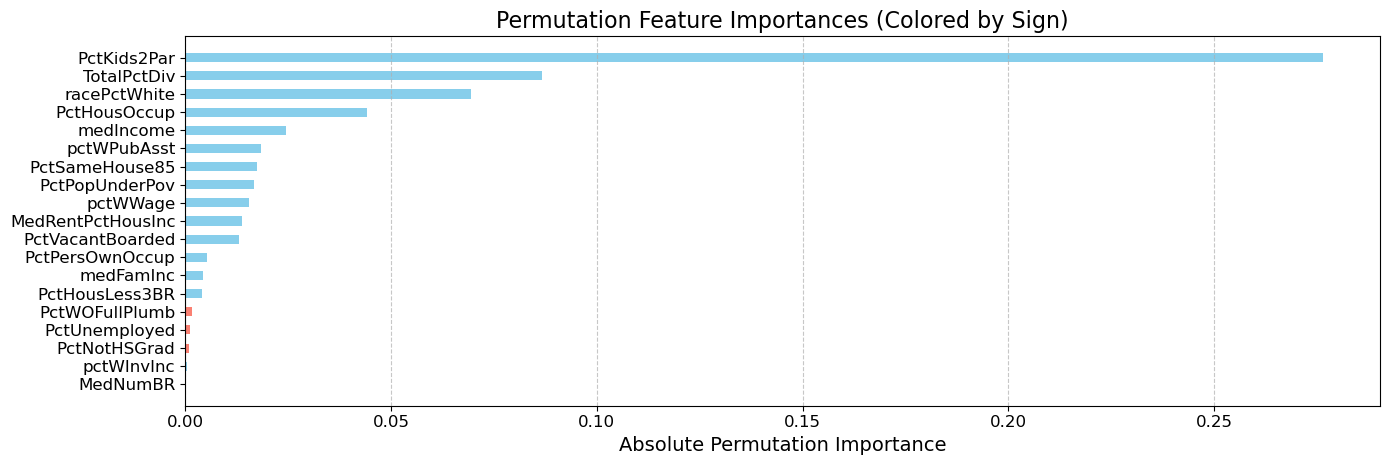

In [99]:
# Assuming `X` is a DataFrame or you have column names in a list
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]

# Verify number of feature names matches the number of features
if len(feature_names) != len(gbm_model.feature_importances_):
    raise ValueError("Mismatch between number of feature names and model features!")

# Compute permutation importance
perm_importance = permutation_importance(gbm_model, X_test, y_test, n_repeats=10, random_state=42)

# Get importances and their absolute values
perm_importance_mean = perm_importance.importances_mean
perm_importance_mean_abs = np.abs(perm_importance_mean)

# Sort features by absolute importance
sorted_idx = perm_importance_mean_abs.argsort()

# Create colors based on the sign of importance
colors = np.where(perm_importance_mean[sorted_idx] >= 0, "skyblue", "salmon")  # Blue for positive, red for negative

# Adjust figure size and bar height for extra spacing
plt.figure(figsize=(14, len(sorted_idx) * 0.25))  # Height scales with number of features
plt.barh(
    np.arange(len(sorted_idx)), 
    perm_importance_mean_abs[sorted_idx],  # Use absolute values for bar lengths
    color=colors,  # Set color based on sign
    align="center", 
    height=0.5  # Narrow bars for spacing
)
plt.yticks(
    np.arange(len(sorted_idx)), 
    np.array(feature_names)[sorted_idx], 
    fontsize=12
)
plt.xlabel("Absolute Permutation Importance", fontsize=14)  # Update label for clarity
plt.title("Permutation Feature Importances (Colored by Sign)", fontsize=16)
plt.xticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Adjust layout to add extra space for labels
plt.subplots_adjust(left=0.4)  # Increase left margin for longer labels
plt.tight_layout()  # Adjust overall layout to fit everything
plt.show()